In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

Light mode palette
Dark mode palette


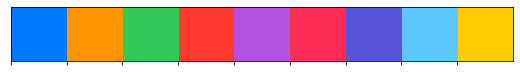

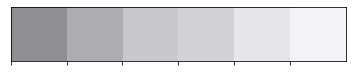

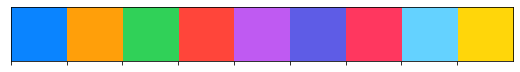

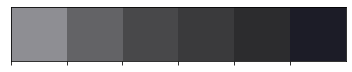

In [3]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

print('Dark mode palette')
sns.palplot(dark_palette)
sns.palplot(gray_dark_palette)

In [4]:
from cycler import cycler

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 150

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [14]:
mvz = pd.read_excel("Agg_Moovizy_V3.xlsx", index_col = 0)
mvz_v3 = pd.read_excel('Moovizy_V3.xlsx', index_col = 0)

In [6]:
mvz.columns

Index(['Date', 'Interval', 'Req', 'Req_2H', 'Req_1D', 'Req_DP',
       'TopSpeed (m/s)', 'Num_Transfer', 'Weekend', 'Day',
       'Total Ticket Sales ', 'Regular User ', 'Irregular Users', 'Lag_Tot',
       'Lag_Days', 'Lag_Hours', 'Lag_Mins', 'Lag_Secs', 'Lag_Tot_Sec'],
      dtype='object')

In [7]:
mvz_freq = mvz.copy()[['Date', 'Interval', 'Day', 'Weekend', 'Num_Transfer',
                    'Req', 'Req_2H', 'Req_1D', 'Req_DP',
                    'Total Ticket Sales ', 'Regular User ', 'Irregular Users'
                    ]]

# Sum each column
sum_req = mvz_freq[['Req', 'Req_2H', 'Req_1D', 'Req_DP', 'Total Ticket Sales ', 'Num_Transfer']].sum(axis = 0) # pd.Series
# Change it to a list
lst_sum_req = list(sum_req) # 209196, 111189, 57035, 40972, 5923, 159.84184569844234


freq    = pd.DataFrame(list(np.array(mvz_freq['Req'])/209196),                columns=['FREQ'])
freq_2h = pd.DataFrame(list(np.array(mvz_freq['Req_2H'])/111189),             columns=['FREQ_2H'])
freq_1d = pd.DataFrame(list(np.array(mvz_freq['Req_1D'])/57035),              columns=['FREQ_1D'])
freq_dp = pd.DataFrame(list(np.array(mvz_freq['Req_DP'])/40972),              columns=['FREQ_DP'])
fticket = pd.DataFrame(list(np.array(mvz_freq['Total Ticket Sales '])/5923),  columns=['FTICKET'])
ftransf = pd.DataFrame(list(np.array(mvz_freq['Num_Transfer'])/160),          columns=['FTRANSF'])

mvz_freq_1 = mvz_freq[['Date', 'Interval', 'Day', 'Weekend']]
df_freq = pd.concat([mvz_freq_1, freq, freq_2h, freq_1d, freq_dp, fticket, ftransf], axis=1)

df_freq.head()

# mvz_freq[['FREQ', 'FREQ_2H', 'FREQ_1D', 'FREQ_DP', 'FTICKET']] 
# pd.DataFrame(weekends, columns=['Weekend'])

Date  Interval     Day  Weekend      FREQ   FREQ_2H   FREQ_1D  \
0.0  2021-02-12       0.0  Friday      0.0  0.000774  0.000000  0.002700   
1.0  2021-02-12       1.0  Friday      0.0  0.000225  0.000000  0.000649   
2.0  2021-02-12       2.0  Friday      0.0  0.000430  0.000000  0.001508   
3.0  2021-02-12       3.0  Friday      0.0  0.000449  0.000189  0.001210   
4.0  2021-02-12       4.0  Friday      0.0  0.000617  0.000486  0.001280   

      FREQ_DP  FTICKET   FTRANSF  
0.0  0.000195      0.0  0.001484  
1.0  0.000244      0.0  0.002394  
2.0  0.000098      0.0  0.001264  
3.0  0.000098      0.0  0.000798  
4.0  0.000049      0.0  0.000541

In [8]:
def score_distribution_scatter_moovizy(f1, f2, x):
    
    fig = plt.figure(figsize=(12, 10),dpi=150) # dpi = dots per inch = resolution (default set at 100.0)

    gs = fig.add_gridspec(5, 6) # Grid: row 0 to 4 & column 0 to 5

    ax = fig.add_subplot(gs[:4,:5])
    ax.set_aspect(x)

    for group in sorted(mvz['Weekend'].unique()):
        mvz_sub = mvz[mvz['Weekend']==group]
        ax.scatter(mvz_sub[f'{f1}'], mvz_sub[f'{f2}'], s=20, alpha=0.6, linewidth=0.5, 
                   label=group
                  )

    sub_axes = [None] * 5
    for idx, group in enumerate(sorted(mvz['Weekend'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[idx,5], aspect=x)
        sub_axes[idx].scatter(mvz[mvz['Weekend']!=group][f'{f1}'], mvz[mvz['Weekend']!=group][f'{f2}'], 
                              s=5, alpha=0.2, color= white_color,
                              linewidth=0.7, label=group, zorder=5
                             )
        sub_axes[idx].scatter(mvz[mvz['Weekend']==group][f'{f1}'], mvz[mvz['Weekend']==group][f'{f2}'], 
                              s=5, alpha=0.6, color= dark_palette[idx],
                              linewidth=0.5, label=group, zorder=10
                             )
        cnt = (mvz['Weekend']==group).sum()
        sub_axes[idx].set_title(f'{group} ({cnt})', loc='left', fontsize=9)
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])

    # for axes in [ax] + sub_axes:
        # axes.set_xlim(-3, 103)
        # axes.set_ylim(-3, 103)

    ax.set_title(f'{f1.capitalize()} & {f2.capitalize()} Distribution', loc='left', fontsize=15, fontweight='bold')    
    ax.set_xlabel(f'{f1.capitalize()}', fontweight='medium')
    ax.set_ylabel(f'{f2.capitalize()}', fontweight='medium')
    ax.legend(title='Weekend', fontsize=10)

    plt.show()
    
    return ax

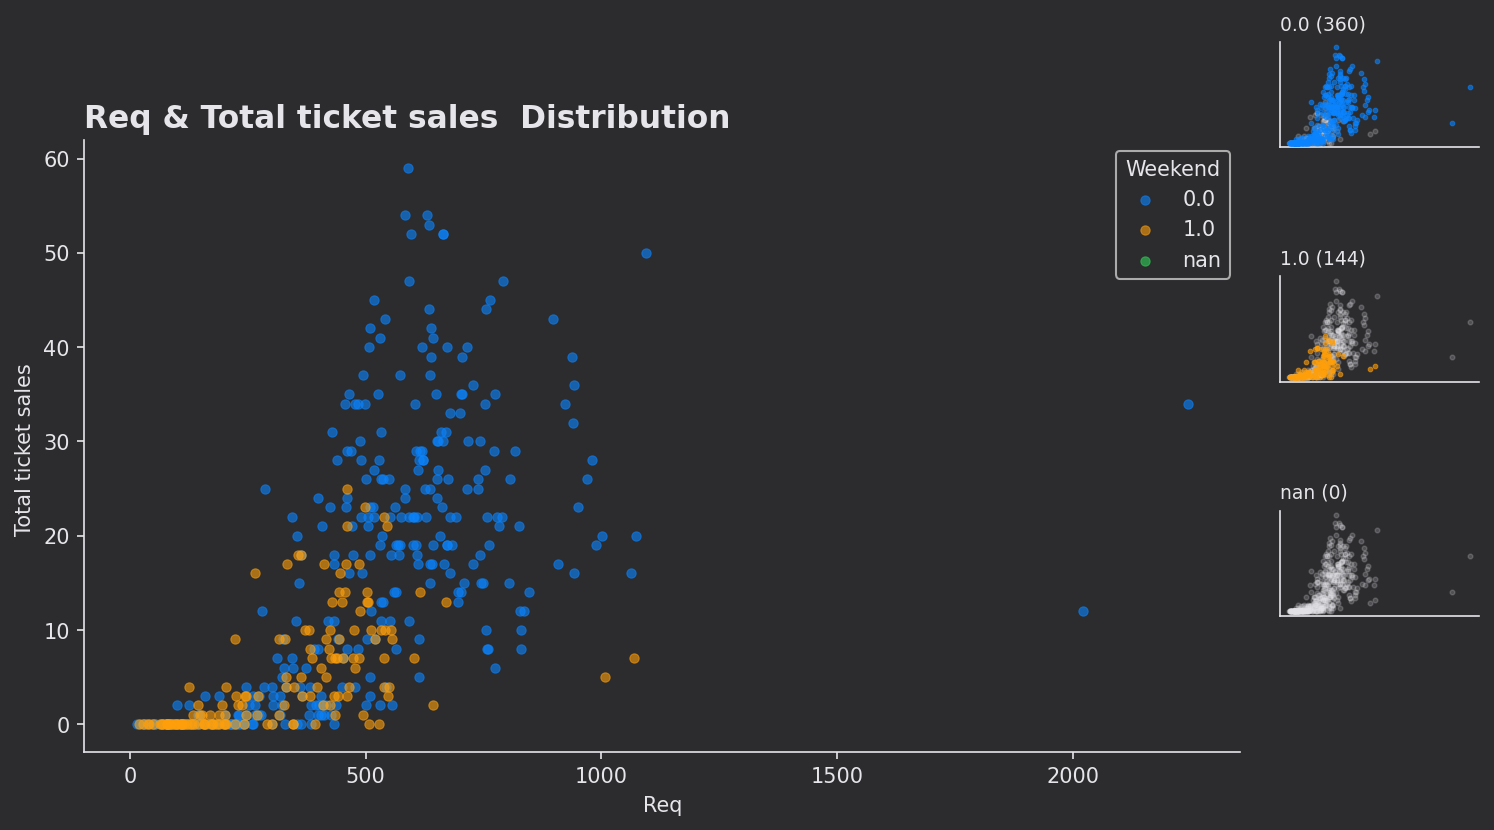

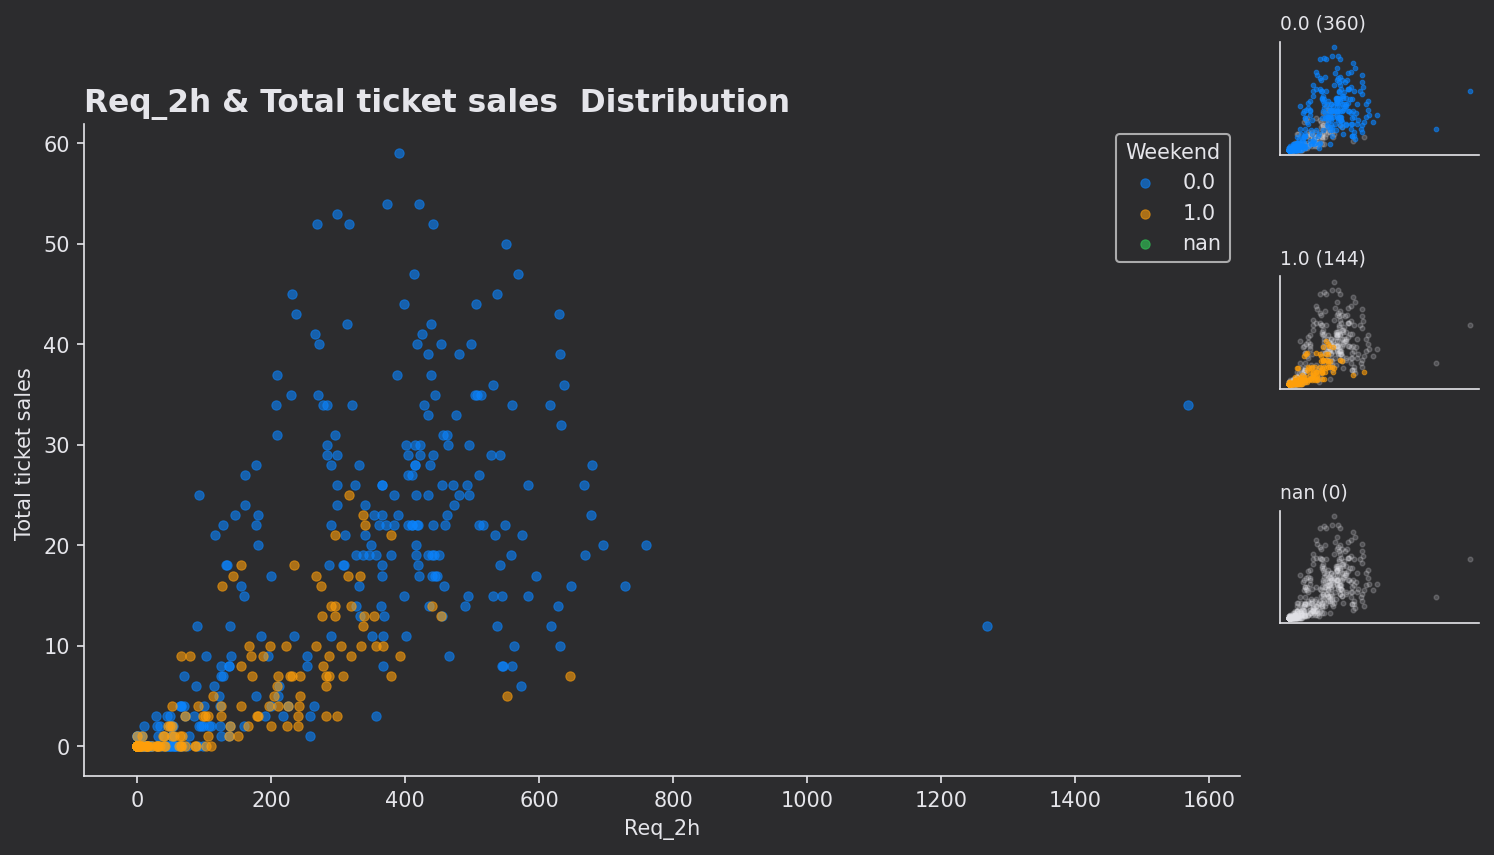

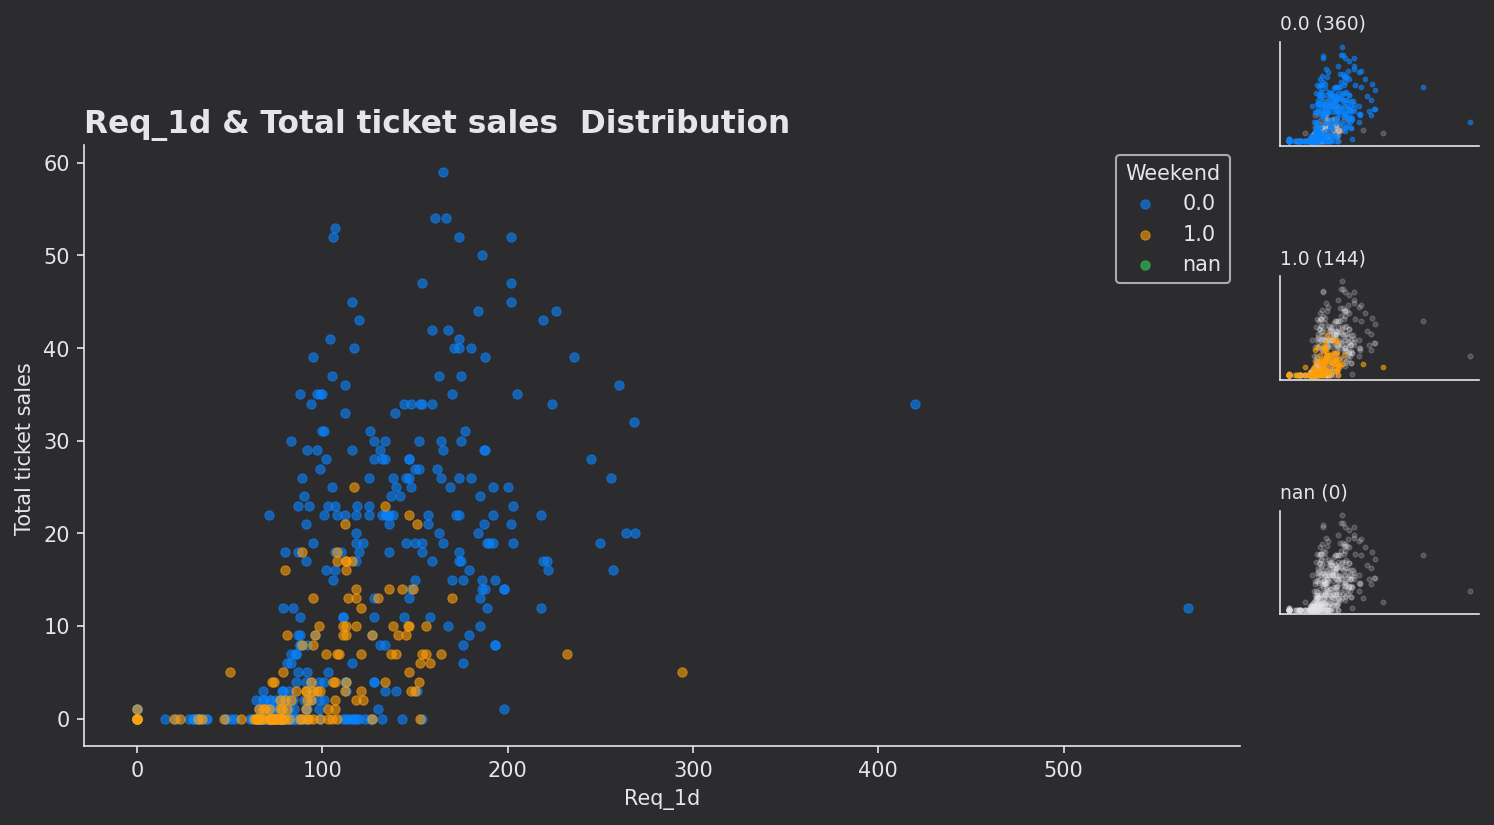

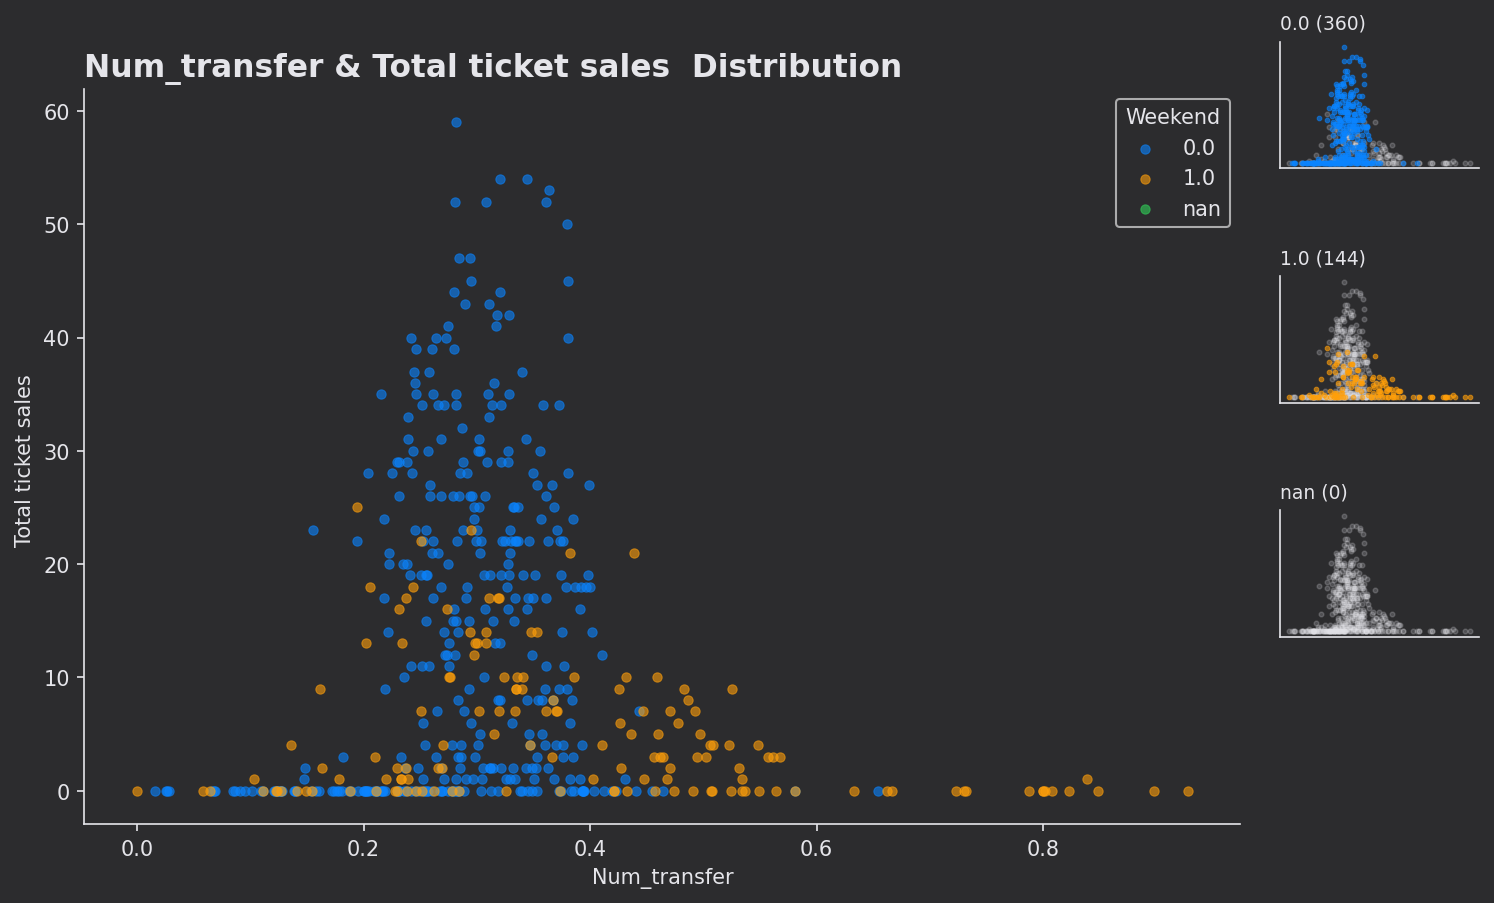

In [13]:
# there is a space after Total Ticket Sales be careful

# score_distribution_moovizy('Req', 'Total Ticket Sales ', 20)
# score_distribution_moovizy('Req_2H', 'Total Ticket Sales ', 15)
# fig, axs = plt.subplots(nrows=2, ncols=2)

# score_distribution_moovizy('Req',    'Total Ticket Sales ', 20)
# score_distribution_moovizy('Req_2H', 'Total Ticket Sales ', 15)
# score_distribution_moovizy('Req_1D', 'Total Ticket Sales ', 5)
# score_distribution_moovizy('Req_DP', 'Total Ticket Sales ', 3.5)

score_distribution_scatter_moovizy('Req',    'Total Ticket Sales ',  20)
score_distribution_scatter_moovizy('Req_2H', 'Total Ticket Sales ',  15)
score_distribution_scatter_moovizy('Req_1D', 'Total Ticket Sales ',   5)
score_distribution_scatter_moovizy('Num_Transfer', 'Total Ticket Sales ', 0.01)

In [362]:
mvz_pair = mvz[['Num_Transfer', 'Req_2H', 'Req_1D', 'Req_DP', 'Weekend', 'Total Ticket Sales ']]

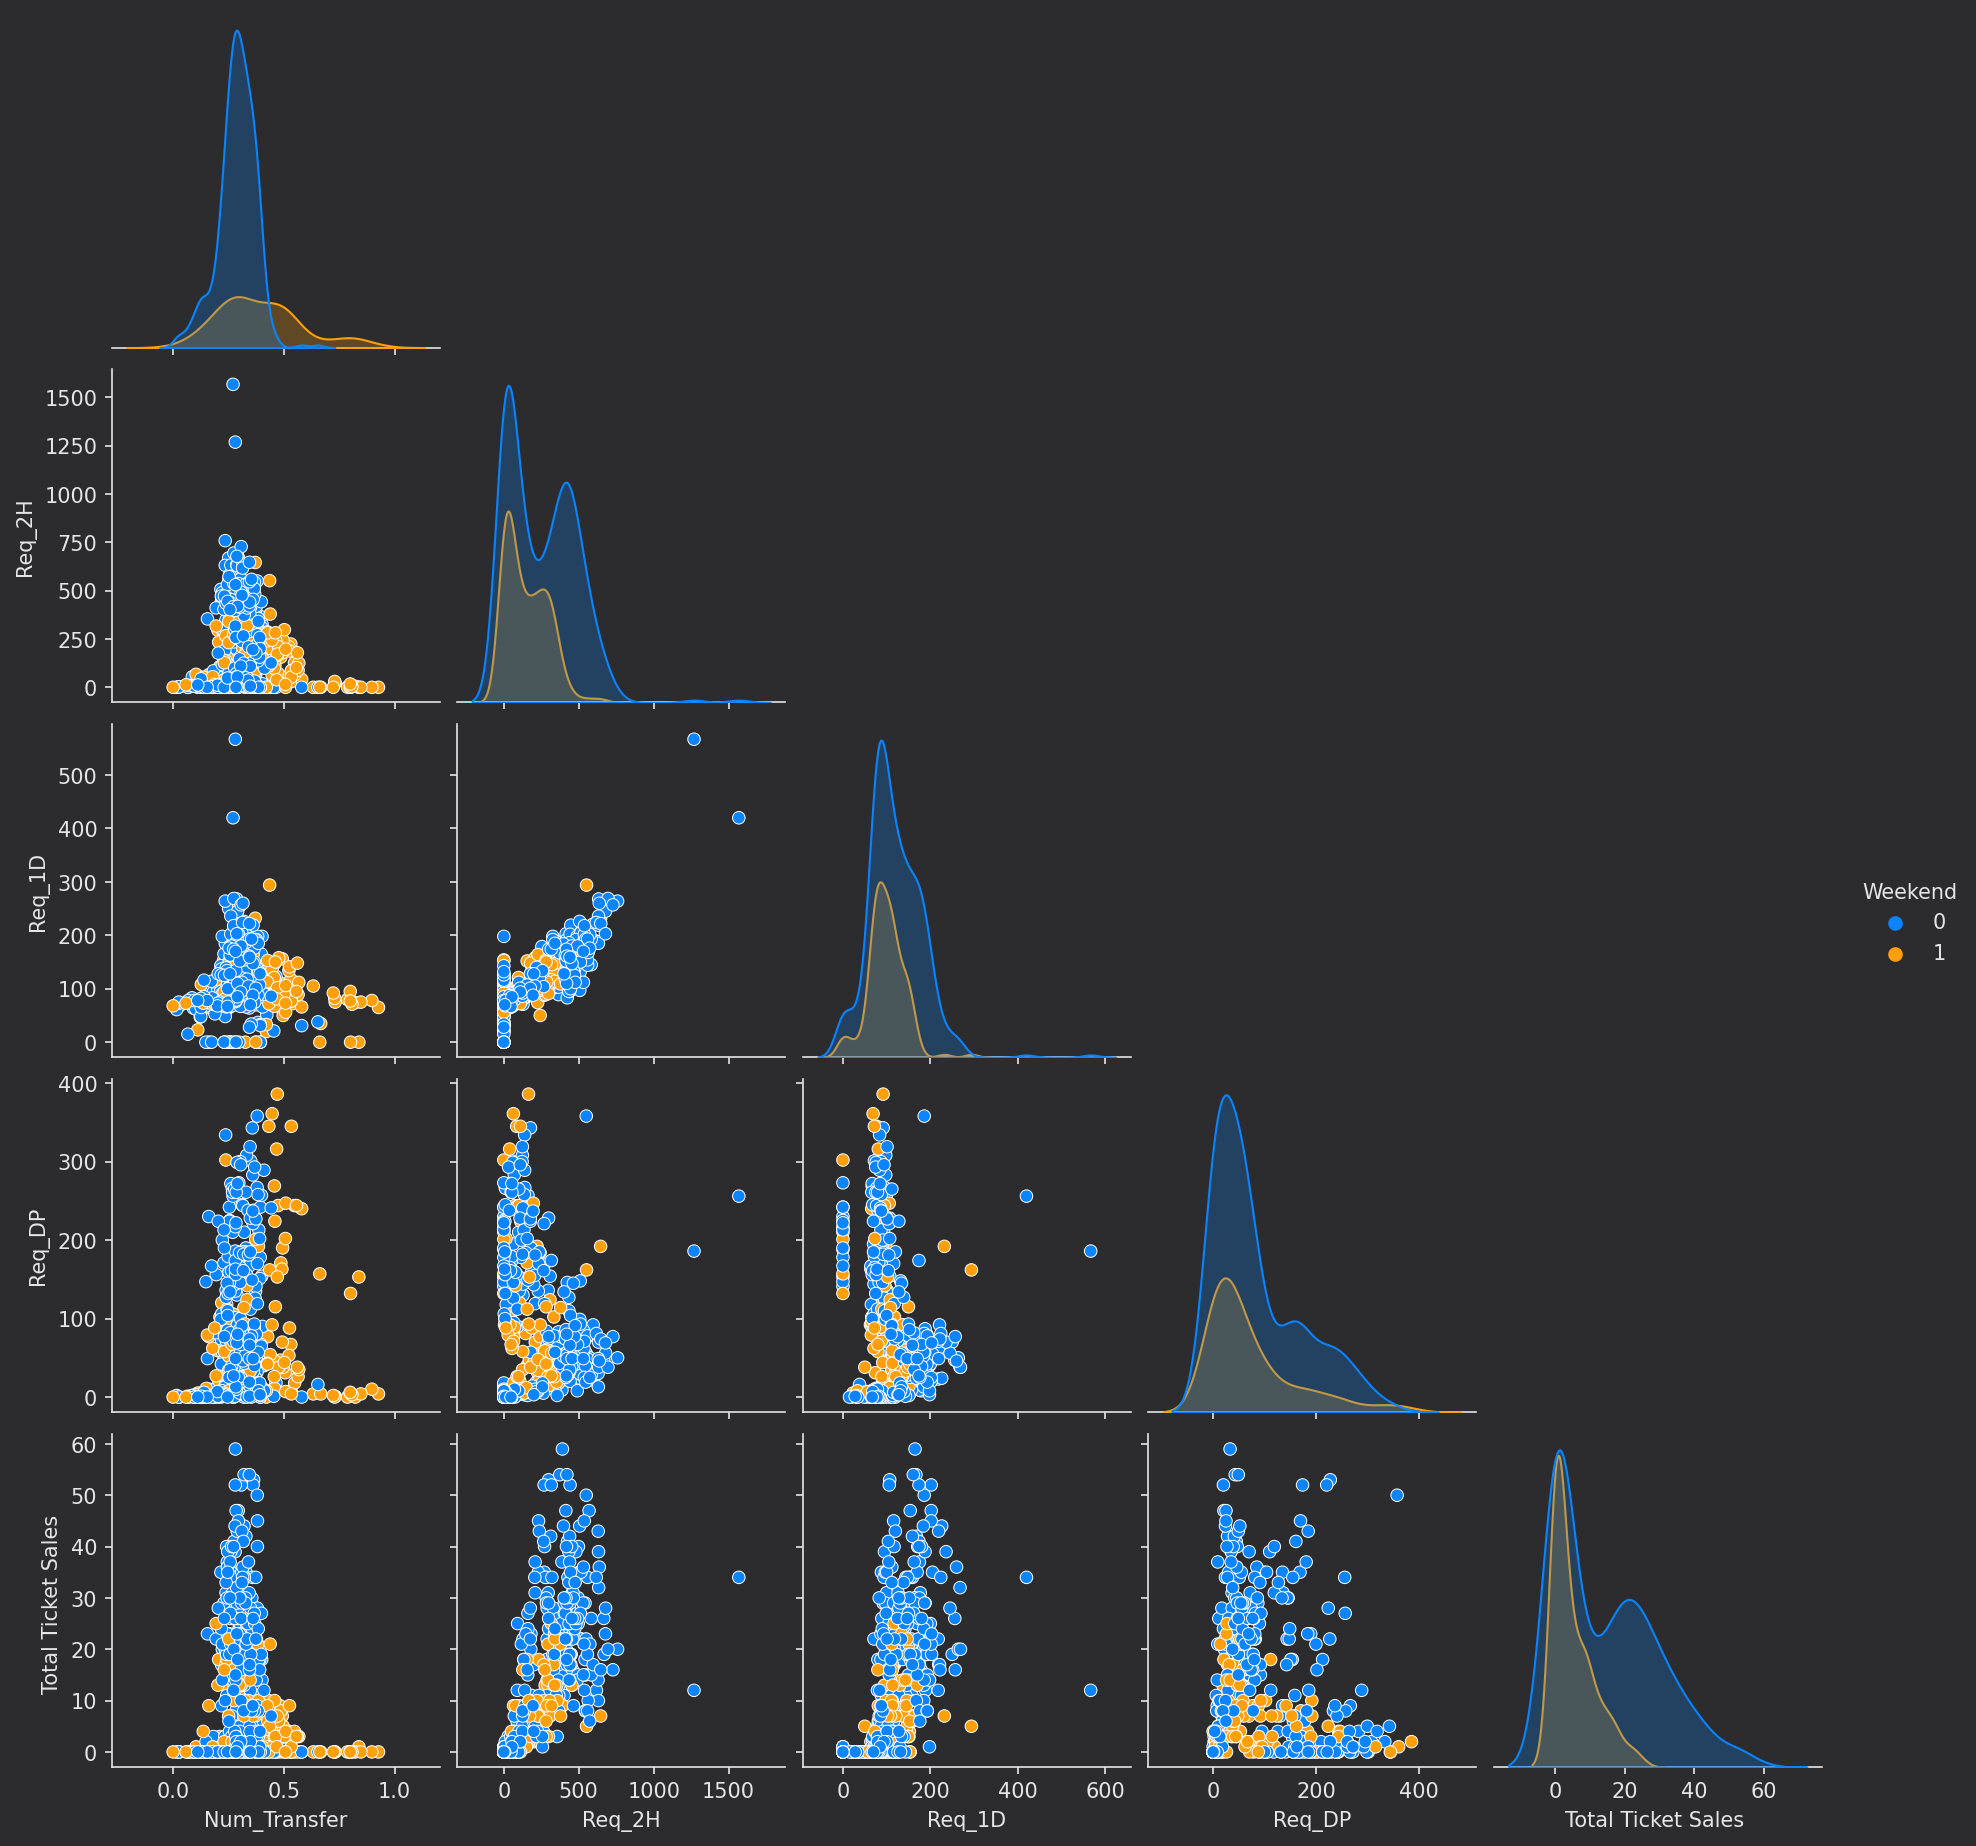

In [340]:
sns.pairplot(mvz_pair, hue='Weekend', corner=True)

In [ ]:
import plotly.graph_objects as go

x, y, z = mvz['Req_2H'], mvz['Num_Transfer'], mvz['Total Ticket Sales ']
gtc = dict(zip(sorted(mvz['Weekend'].unique()), raw_dark_palette[:5]))
color = mvz['Weekend'].map(gtc)


fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=color,
        opacity=0.8
    )
)], layout=go.Layout(
    plot_bgcolor='rgba(255,0,0,1)',
    paper_bgcolor=f'rgb{raw_gray_dark_palette[-2]}',
    font=dict(color='white'))
)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(scene = dict(
                    xaxis_title='REQ_2H',
                    yaxis_title='Num_Transfer',
                    zaxis_title='TICKET SALES',
    
                    xaxis = dict(
                         gridcolor="white",
                         showbackground=False,
                         zerolinecolor="white",
                        #range=[0, 100]
                    ),
                    yaxis = dict(
                        gridcolor="white",
                         showbackground=False,
                        zerolinecolor="white",
                        #range=[0, 100]
                    ),
                    zaxis = dict(
                        gridcolor="white",
                         showbackground=False,
                        zerolinecolor="white",
                        #range=[0, 100]                    
                    )),
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )

camera = dict(
    eye=dict(x=1.4, y=1.4, z=1.4)
)


fig.update_layout(scene_camera=camera)

fig.show()

In [198]:
def score_distribution_kde_moovizy_2(column):
    fig = plt.figure(figsize=(10, 7))
    gs = fig.add_gridspec(6, 7)
    ax = fig.add_subplot(gs[:5,:])

    sns.kdeplot(x=column, hue='Day', data=mvz,
                hue_order=sorted(mvz['Day'].unique()),
                bw_adjust=0.4,
                fill=True,ax=ax)
    
    sub_axes = [None] * 7
    for idx, group in enumerate(sorted(mvz['Day'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[5,idx])
        sns.kdeplot(x=column, data=mvz,
                    alpha=0.2, color= white_color,
                    linewidth=0.7, label=group, fill=True, bw_adjust=0.4,
                    zorder=5, ax=sub_axes[idx]
                   )

        sns.kdeplot(x=column, data=mvz[mvz['Day']==group],
                    alpha=0.6, color= dark_palette[idx],
                    linewidth=0.5, label=group, fill=True,bw_adjust=0.4,
                    zorder=10, ax=sub_axes[idx]
                   )
        
        cnt = (mvz['Day']==group).sum()
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])
        sub_axes[idx].set_xlabel('')
        sub_axes[idx].set_ylabel('')

    ax.set_title(column.capitalize(), loc='left', fontweight='bold', fontsize=13)

    fig.tight_layout()
    plt.show()
    
    return ax

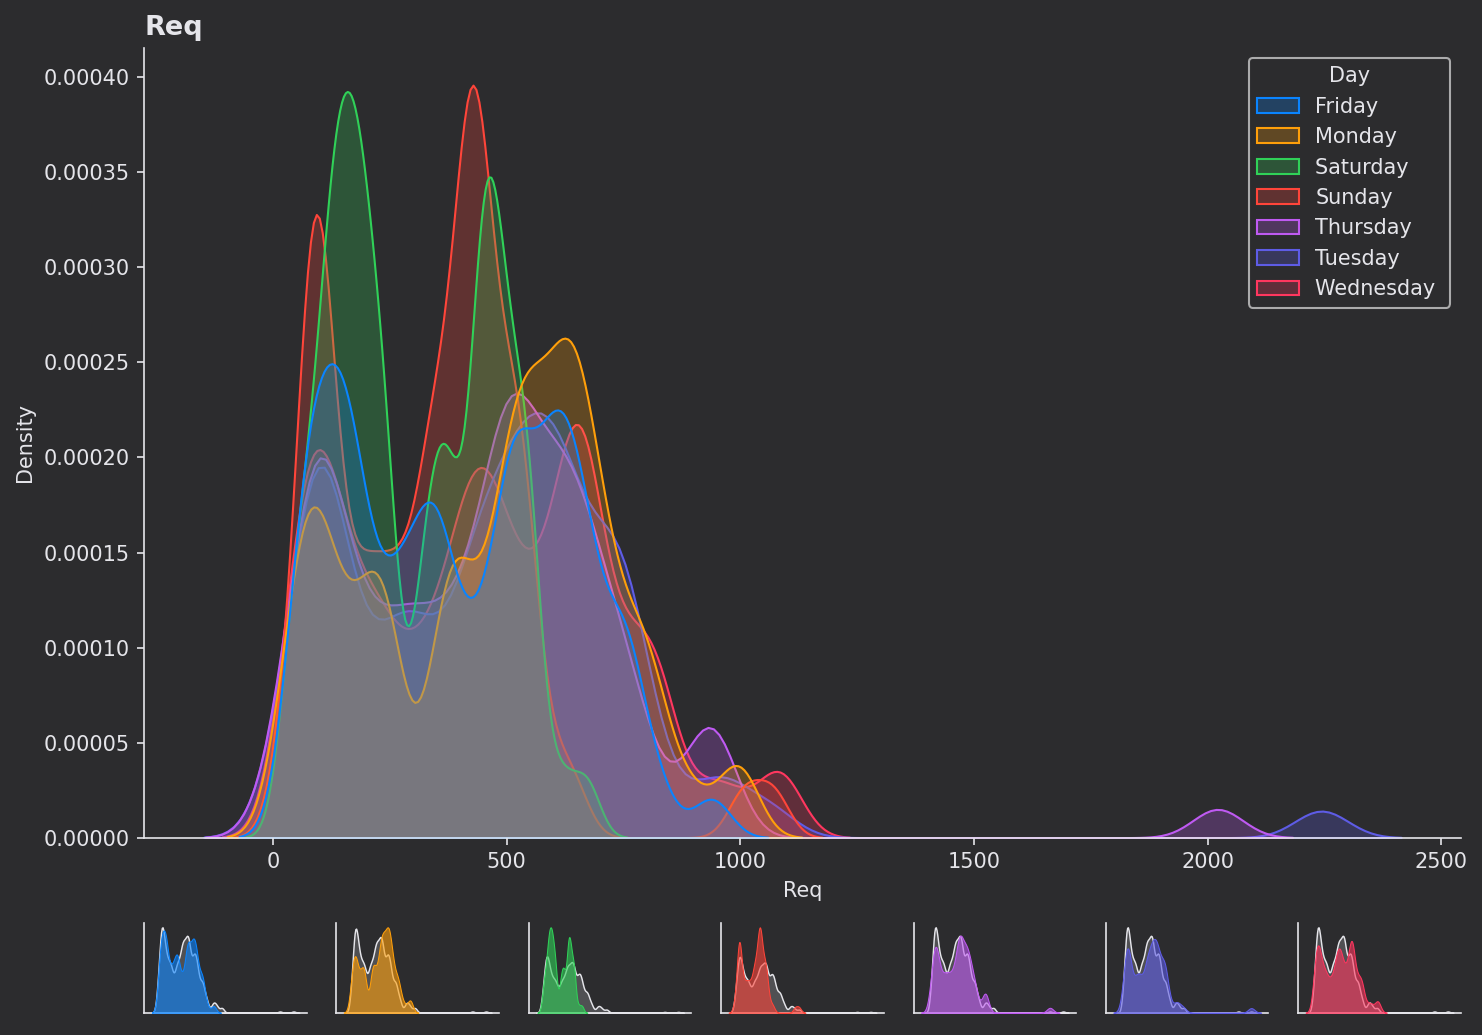

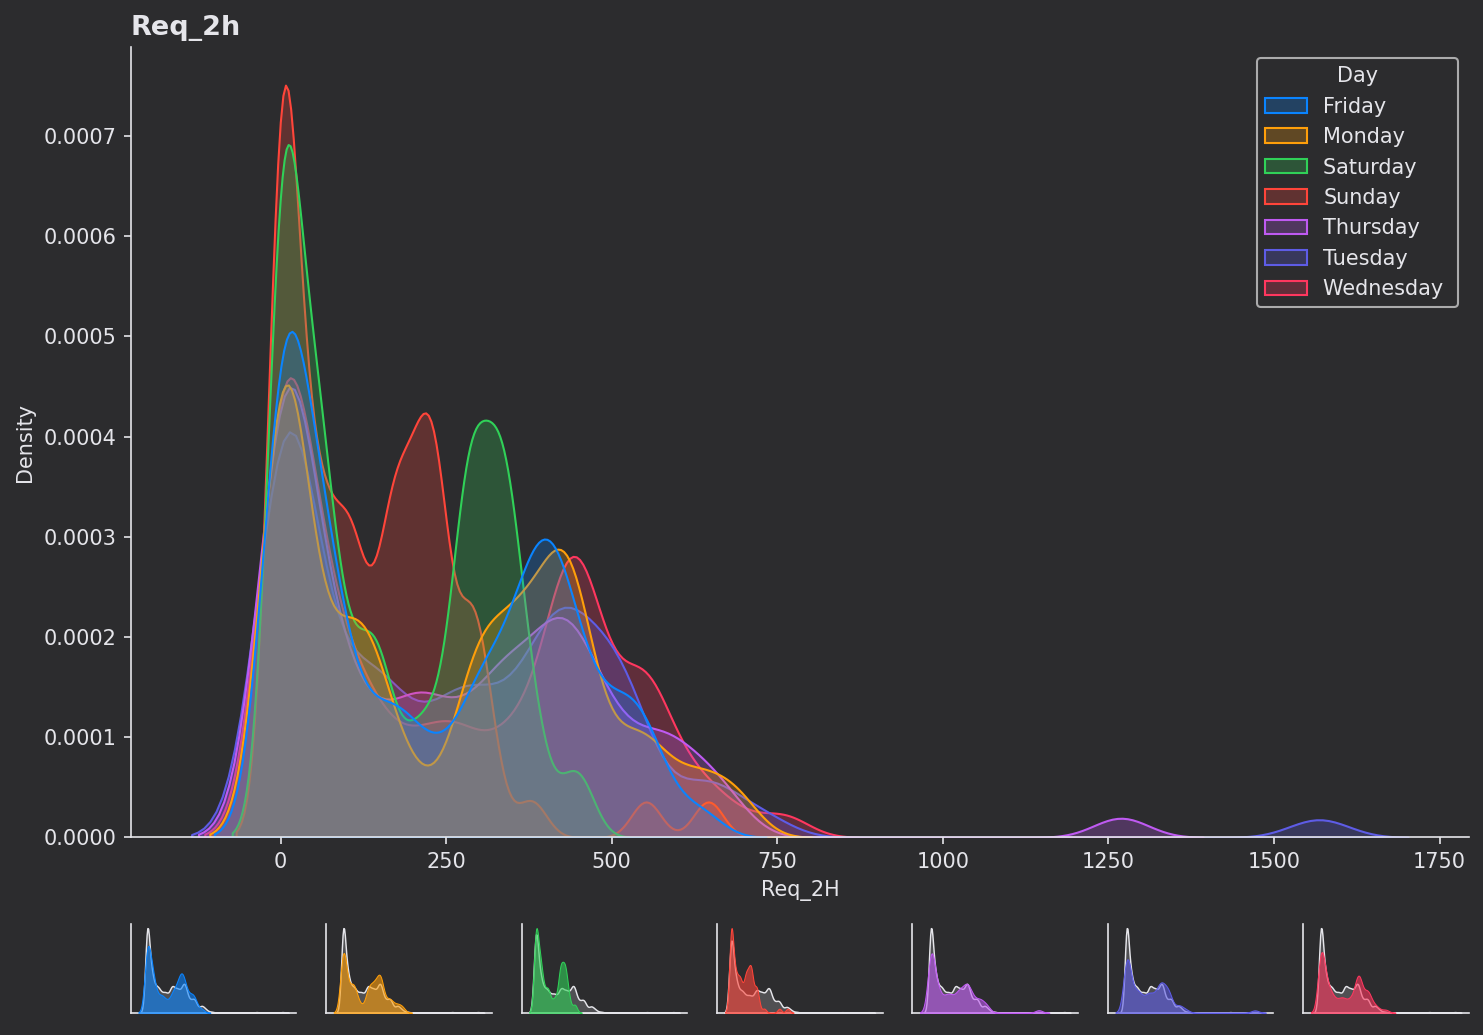

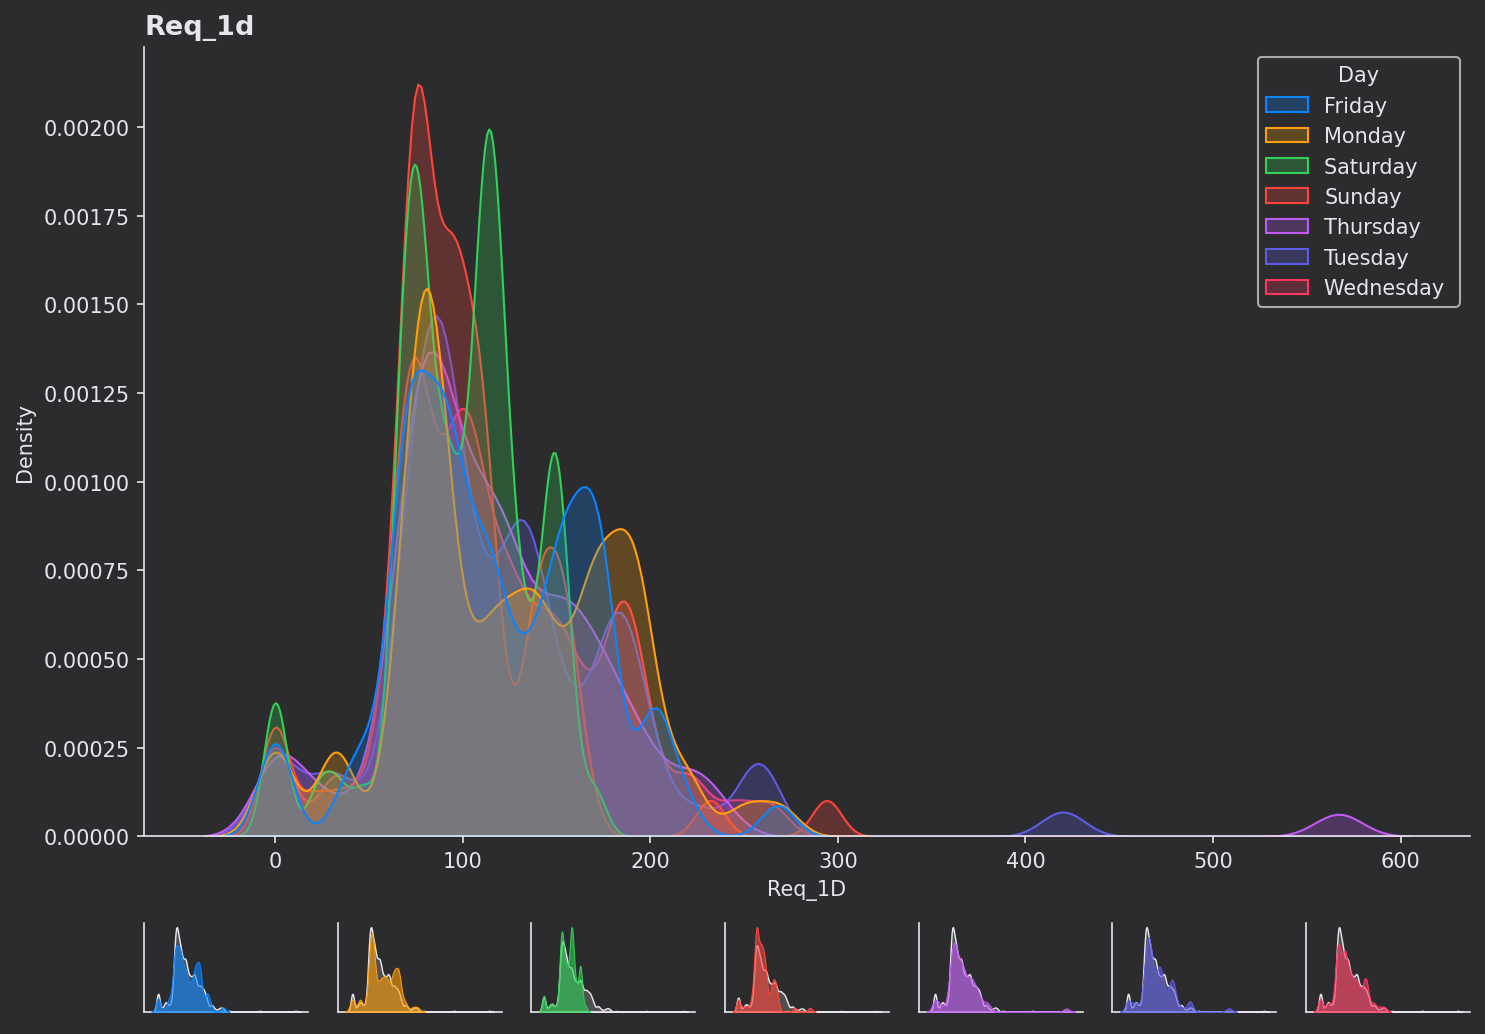

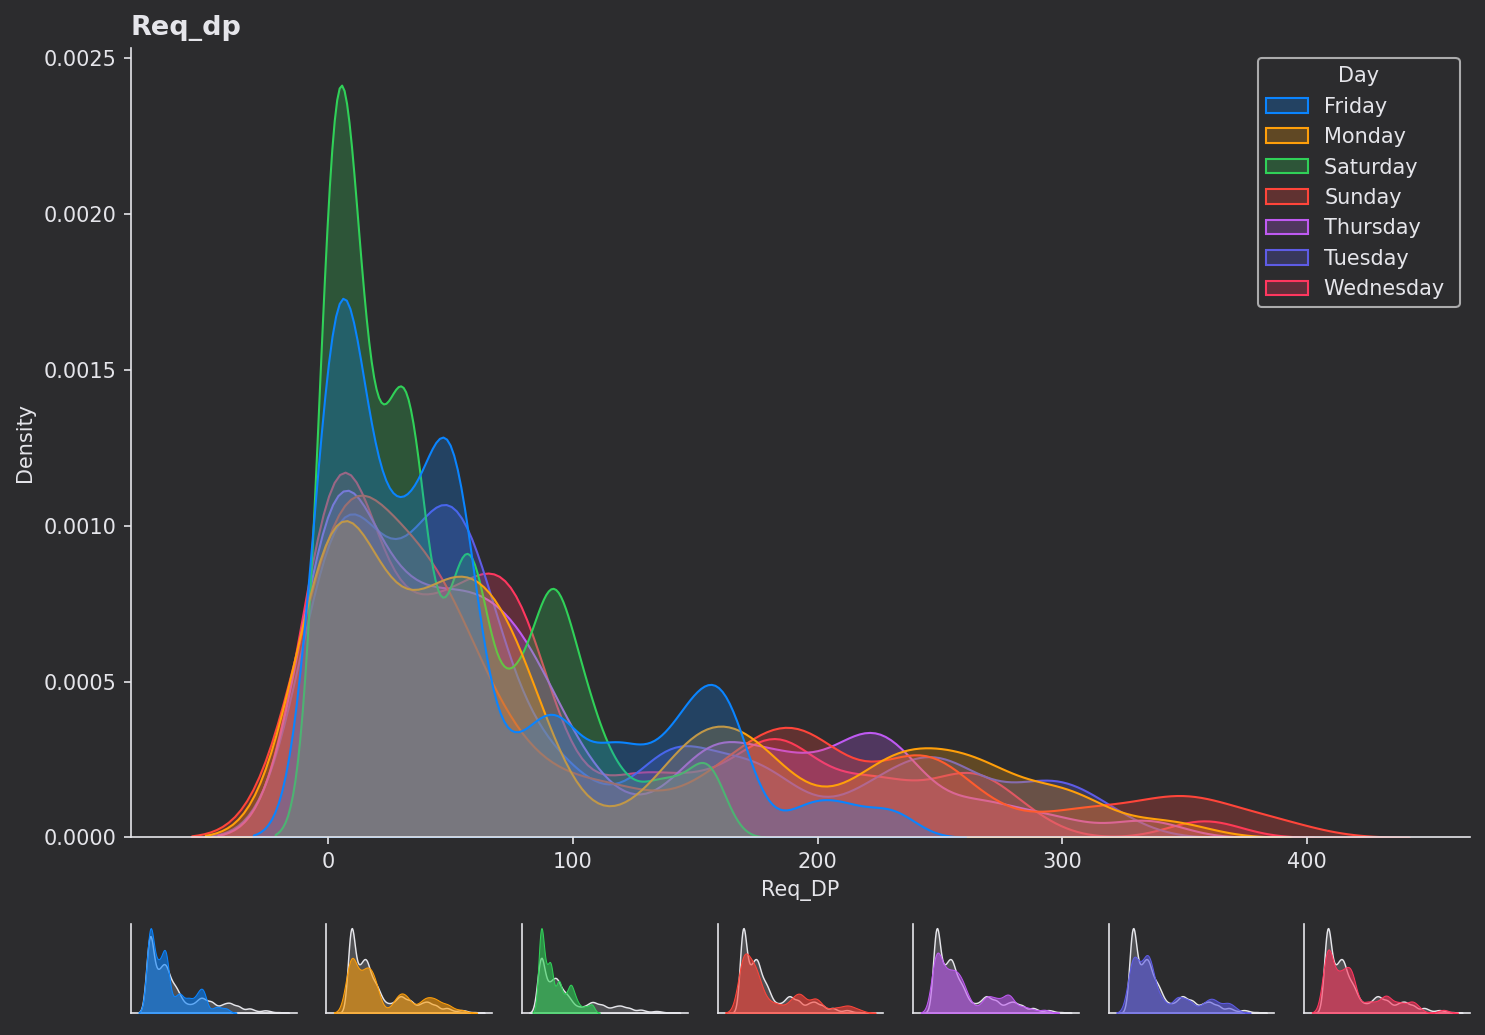

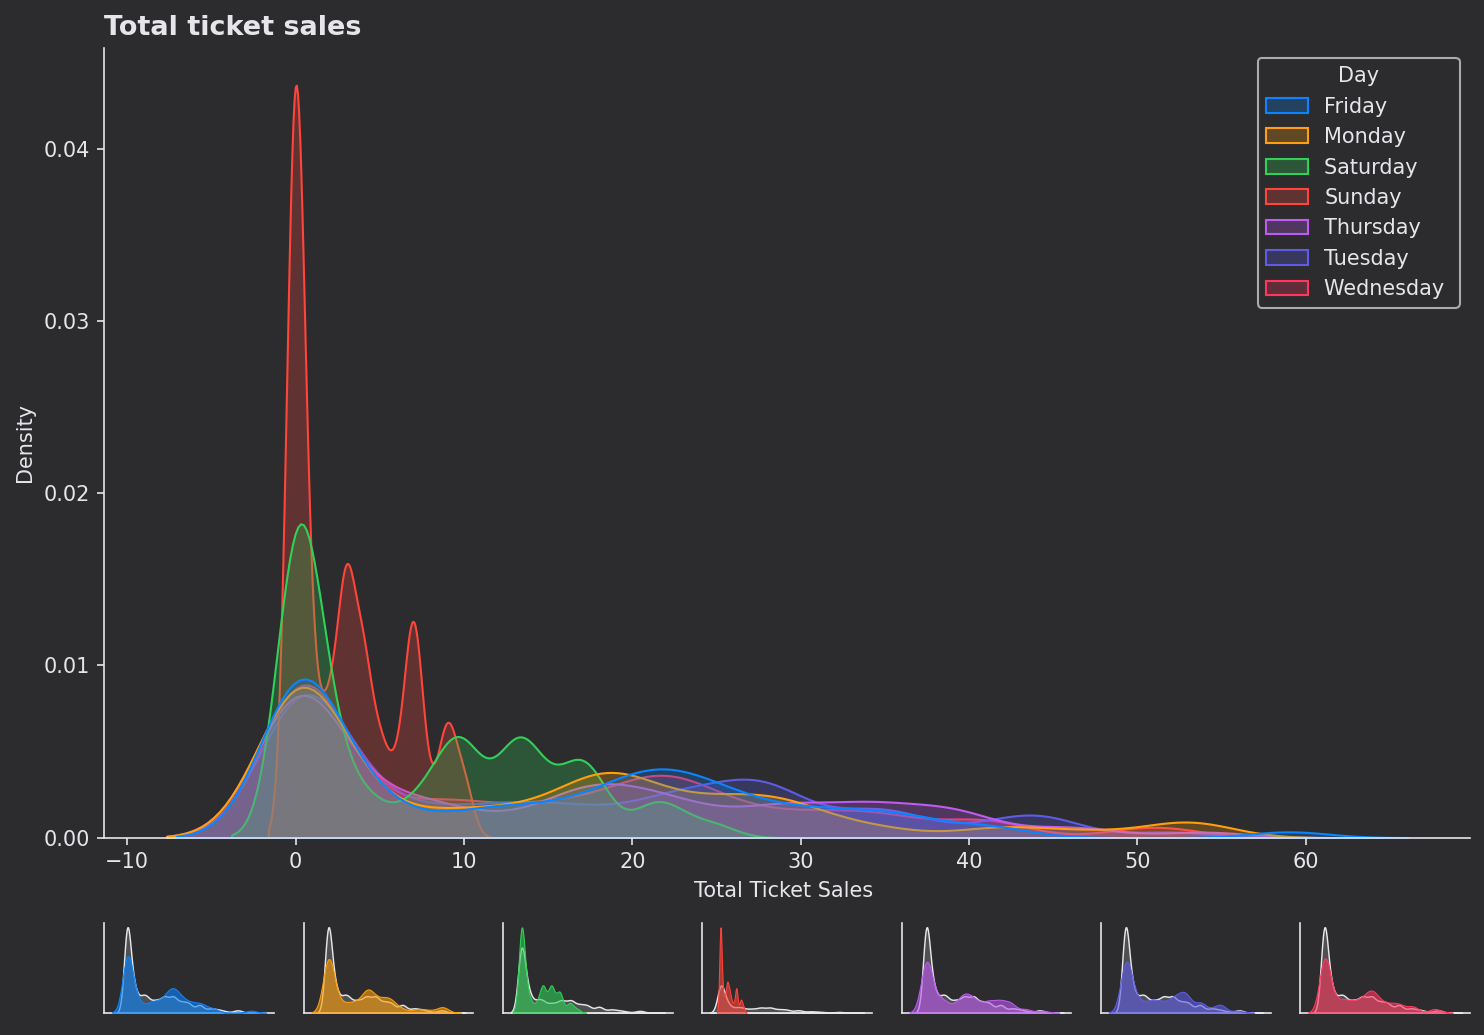

In [200]:
score_distribution_kde_moovizy_2('Req')
score_distribution_kde_moovizy_2('Req_2H')
score_distribution_kde_moovizy_2('Req_1D')
score_distribution_kde_moovizy_2('Req_DP')
score_distribution_kde_moovizy_2('Total Ticket Sales ')

In [212]:
def score_distribution_hist_moovizy(column):
    fig = plt.figure(figsize=(10, 7))
    gs = fig.add_gridspec(6, 7)
    ax = fig.add_subplot(gs[:5,:])

    sns.histplot(x=column, hue='Day', data=mvz,
                hue_order=sorted(mvz['Day'].unique()), bins=30, kde=True, alpha=.3,
                fill=True ,ax=ax)
    
    sub_axes = [None] * 7
    for idx, group in enumerate(sorted(mvz['Day'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[5,idx])
        sns.histplot(x=column, data=mvz,
                    alpha=0.2, color= white_color,
                    linewidth=0.7, label=group, fill=True, bins=30, kde=True,
                    zorder=5, ax=sub_axes[idx]
                   )

        sns.histplot(x=column, data=mvz[mvz['Day']==group],
                    alpha=0.6, color= dark_palette[idx],
                    linewidth=0.5, label=group, fill=True, bins=30, kde=True,
                    zorder=10, ax=sub_axes[idx]
                   )
        
        cnt = (mvz['Day']==group).sum()
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])
        sub_axes[idx].set_xlabel('')
        sub_axes[idx].set_ylabel('')

    ax.set_title(column.capitalize(), loc='left', fontweight='bold', fontsize=13)

    fig.tight_layout()
    plt.show()
    
    return ax

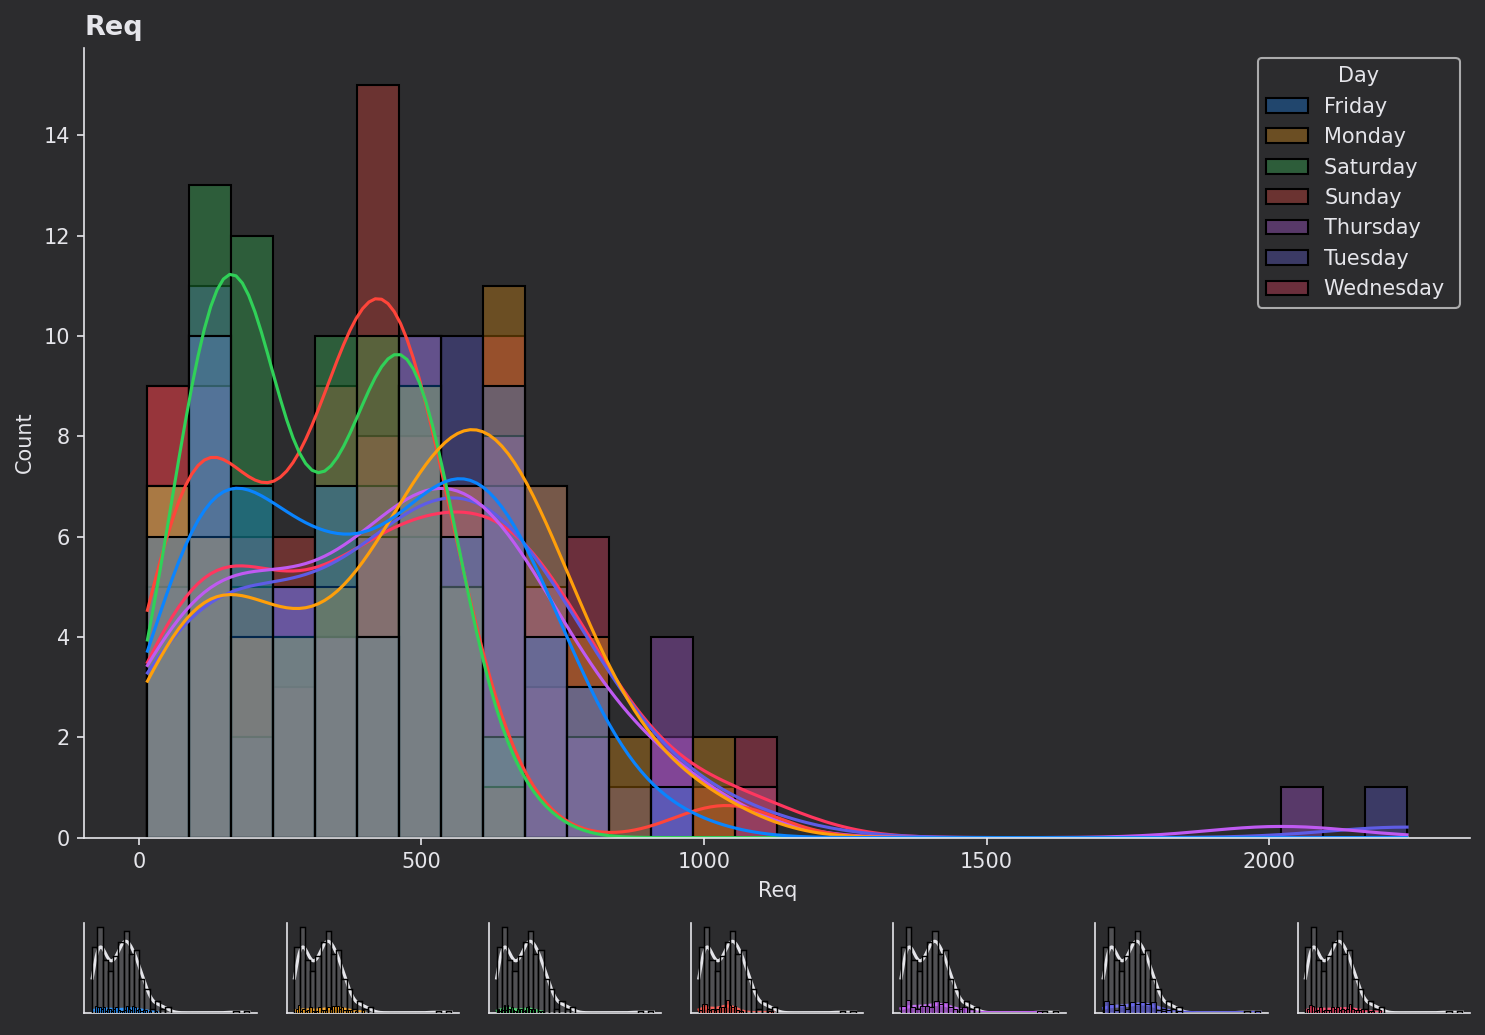

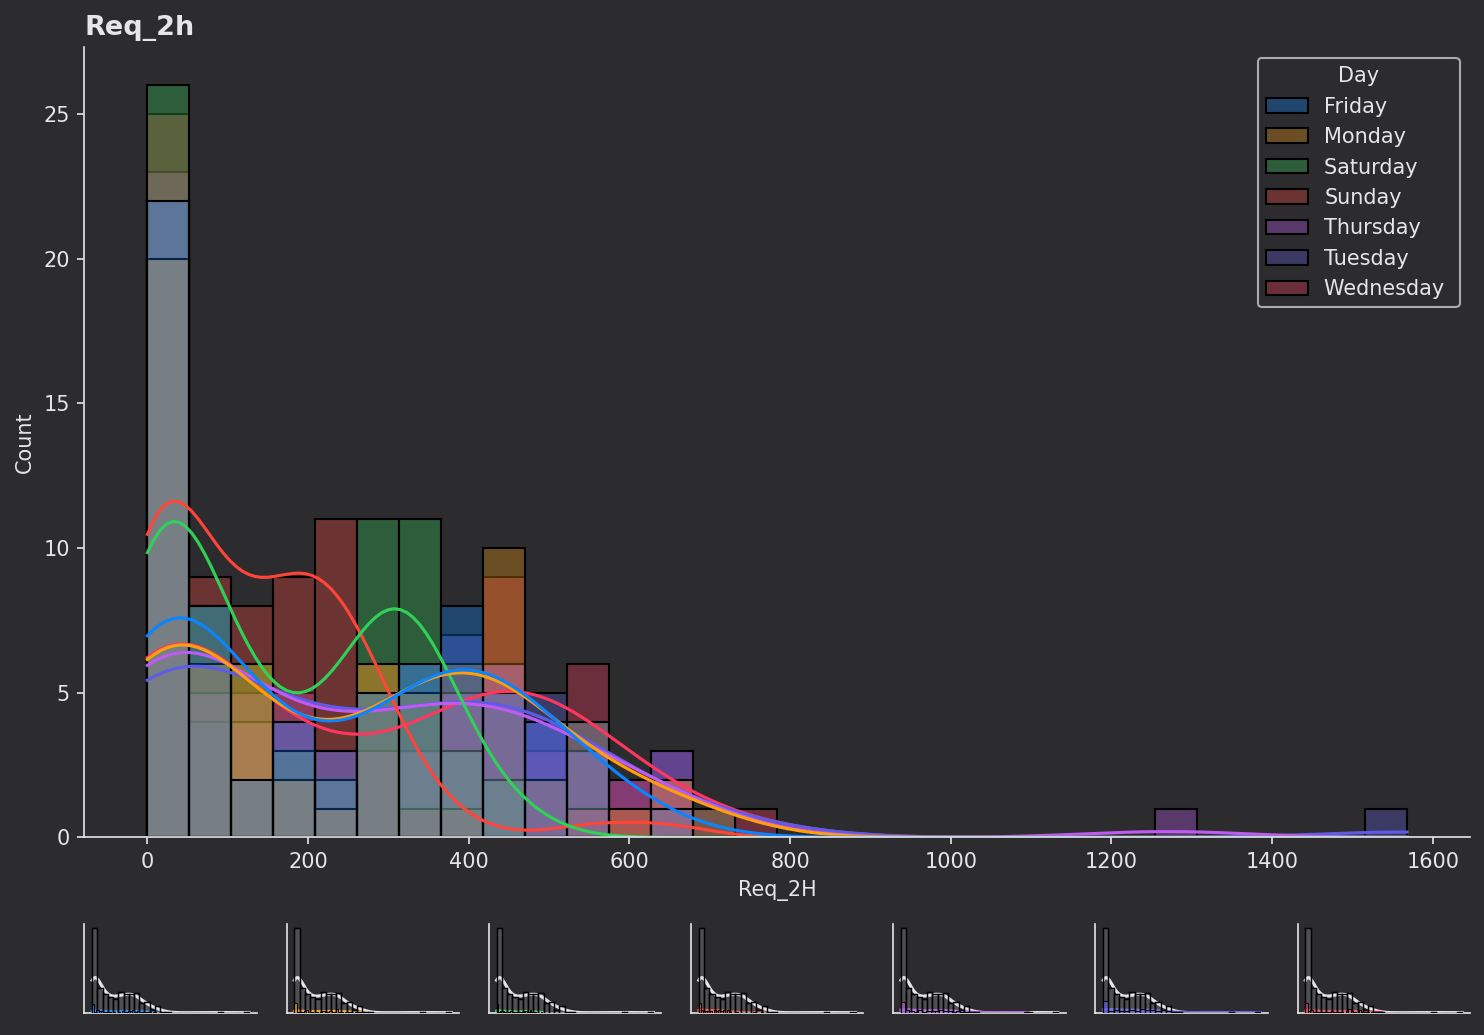

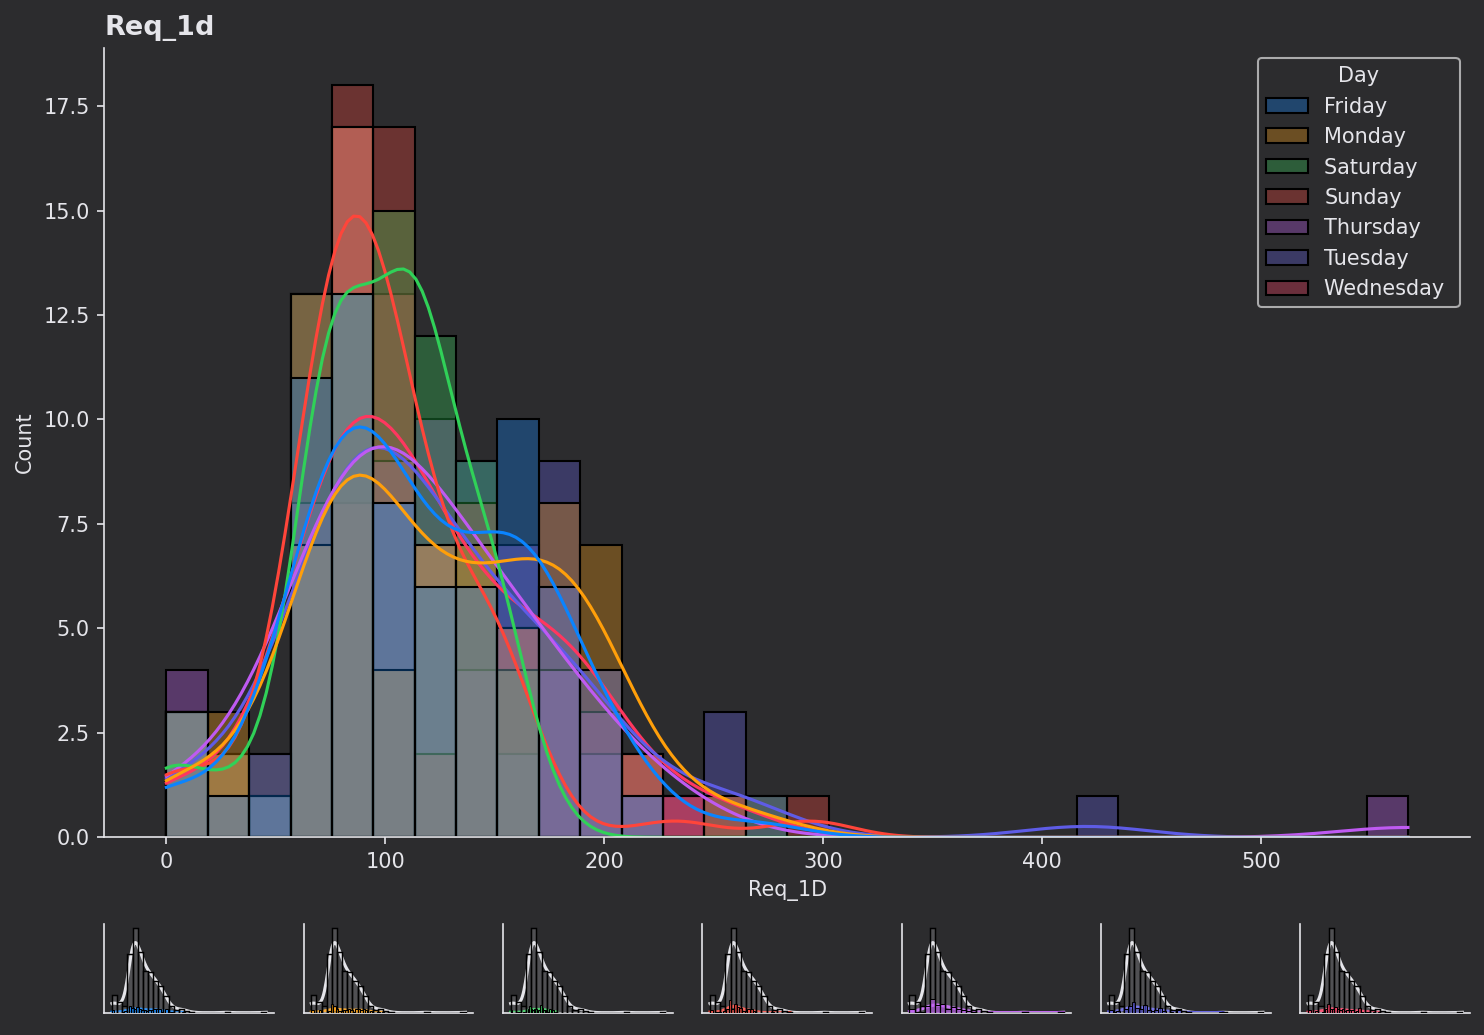

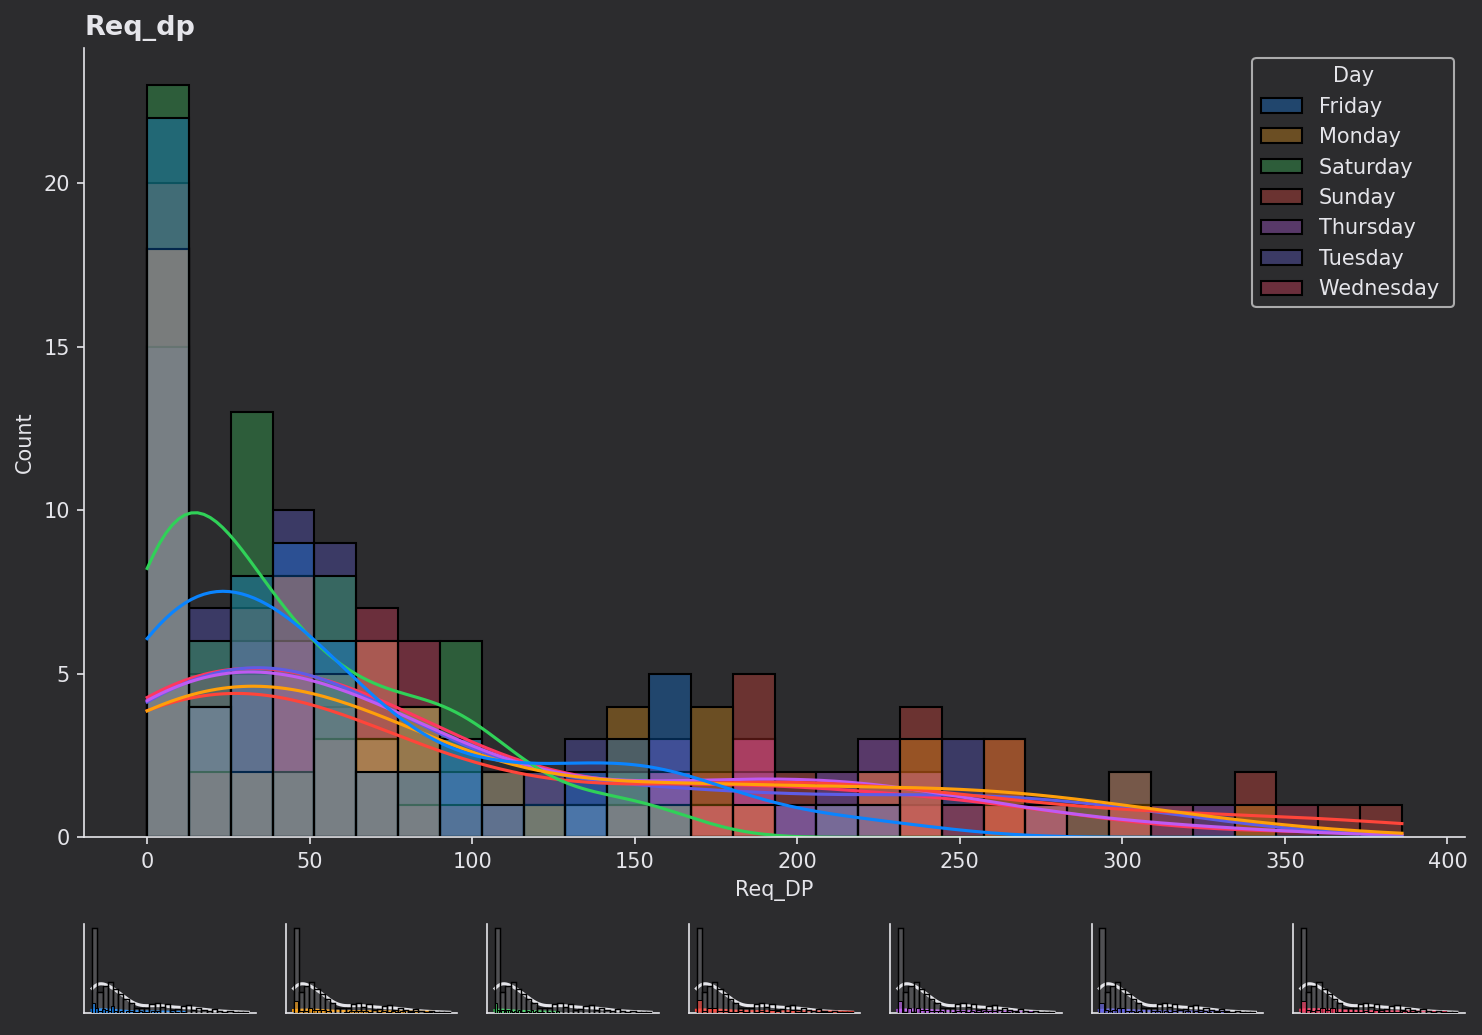

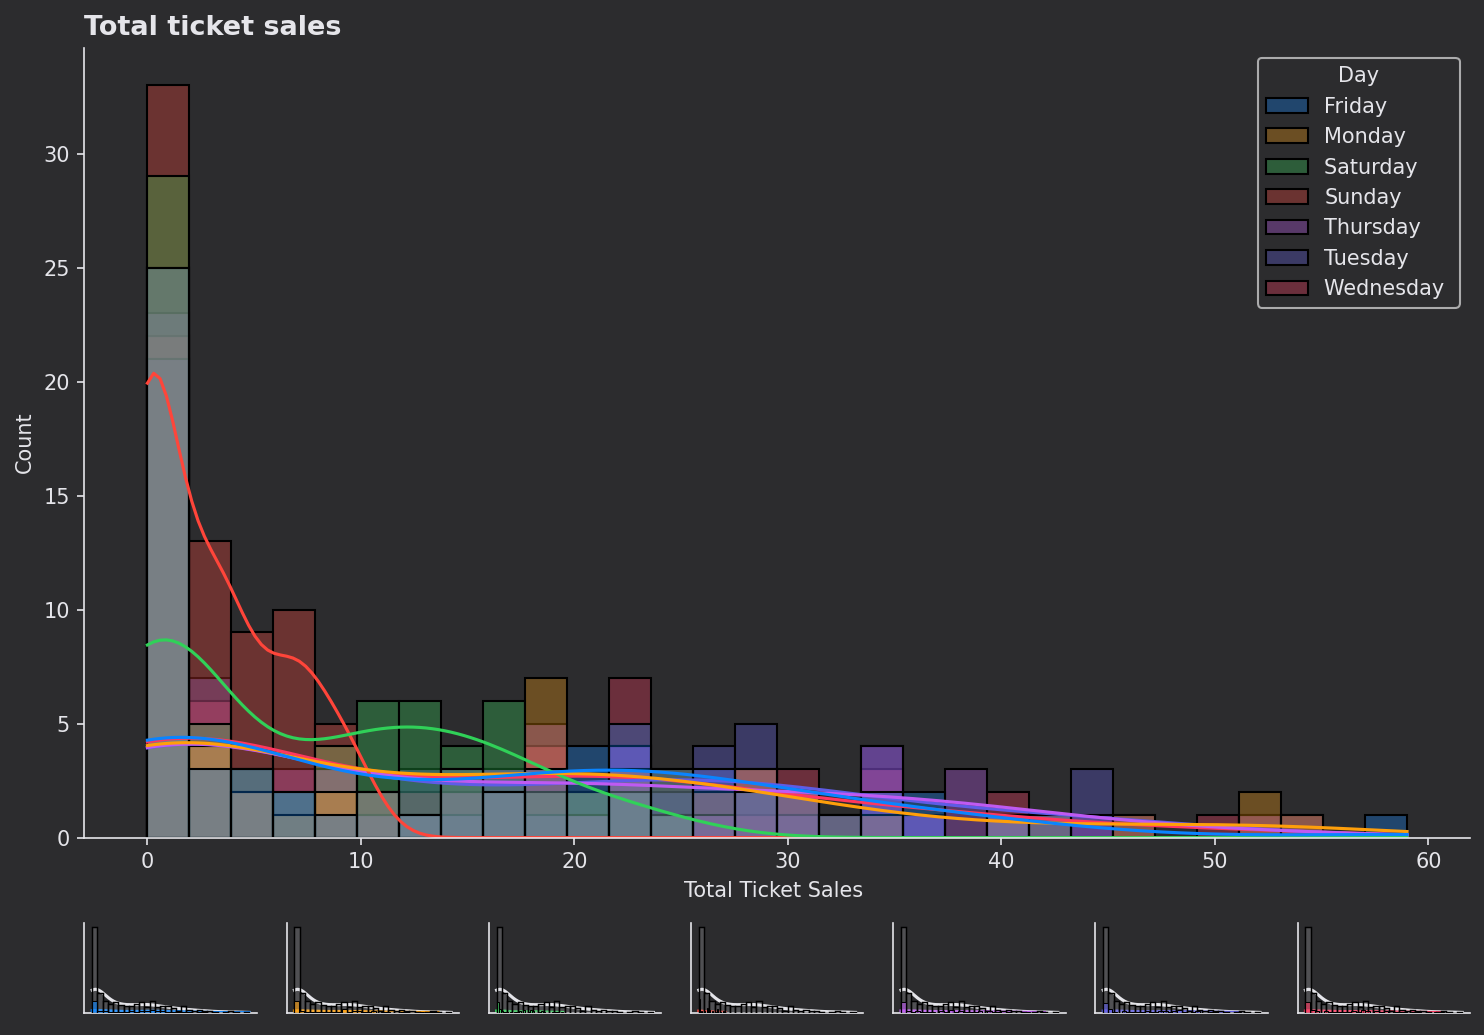

In [213]:
# fig = plt.figure(figsize=(10, 7))
# gs = fig.add_gridspec(6, 7)
# ax = fig.add_subplot(gs[:5,:])
# sns.kdeplot(x='Req', data=mvz, color='w', bw_adjust=0.4)

# sns.histplot(data=mvz, x="Req", hue="Day")
# sns.histplot(data=mvz, x="Req_1D", hue="Day")

score_distribution_hist_moovizy("Req")
score_distribution_hist_moovizy("Req_2H")
score_distribution_hist_moovizy("Req_1D")
score_distribution_hist_moovizy("Req_DP")
score_distribution_hist_moovizy("Total Ticket Sales ")

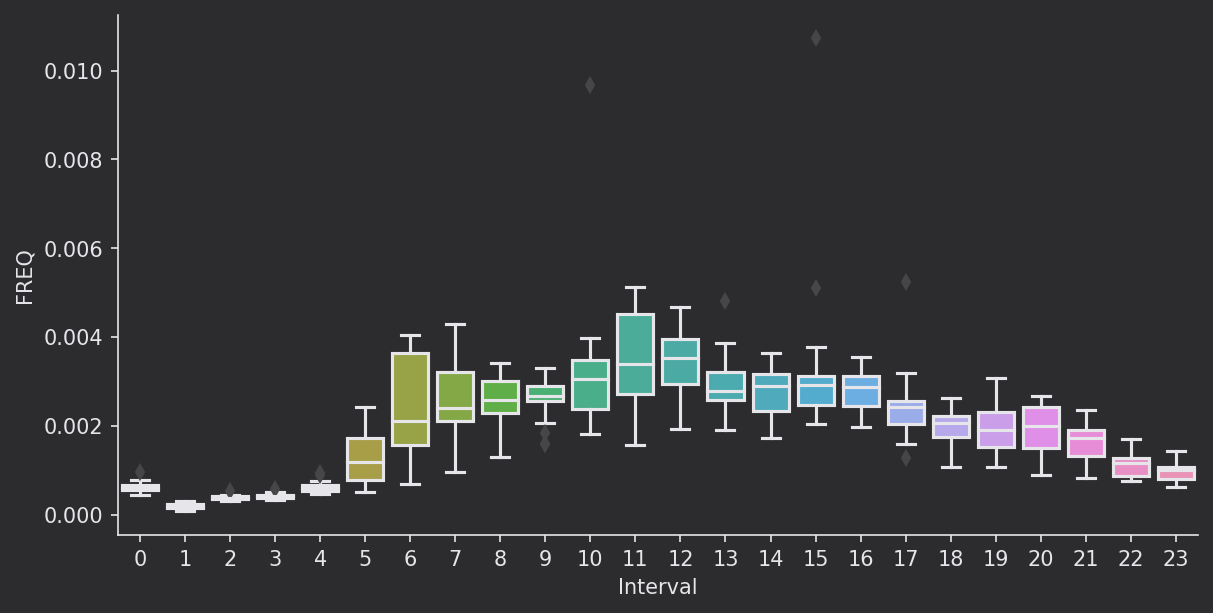

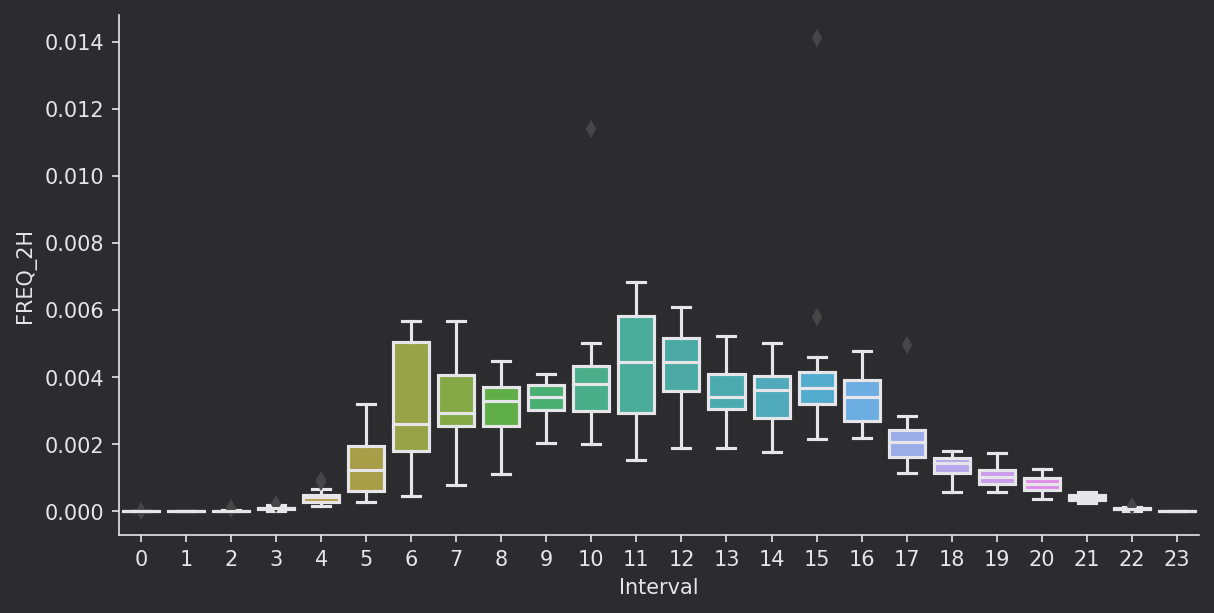

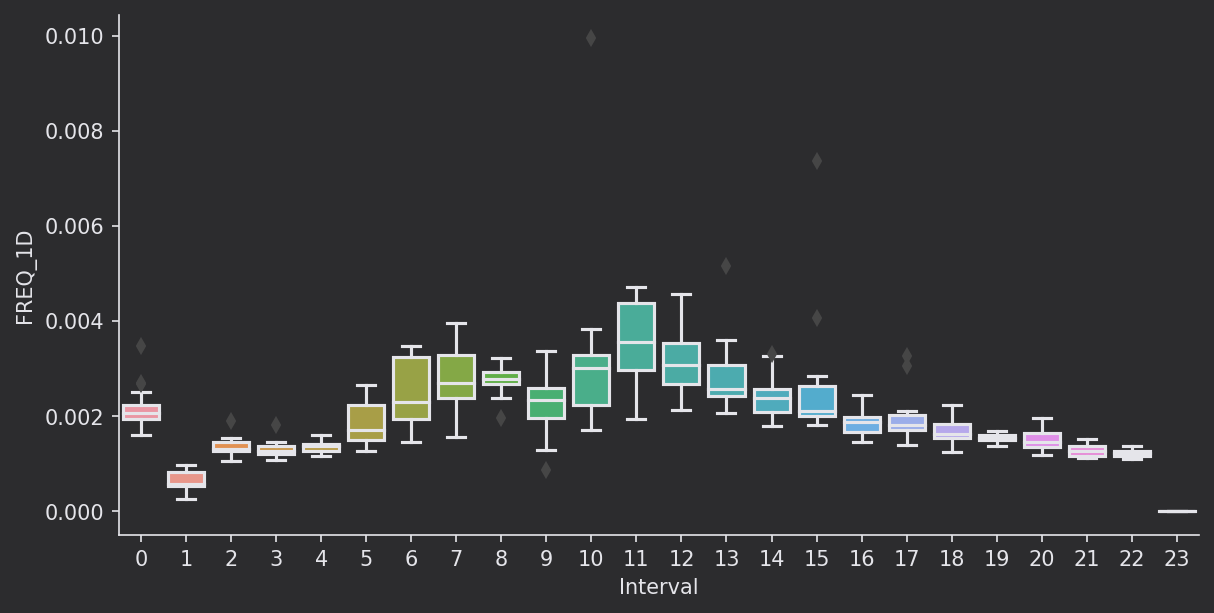

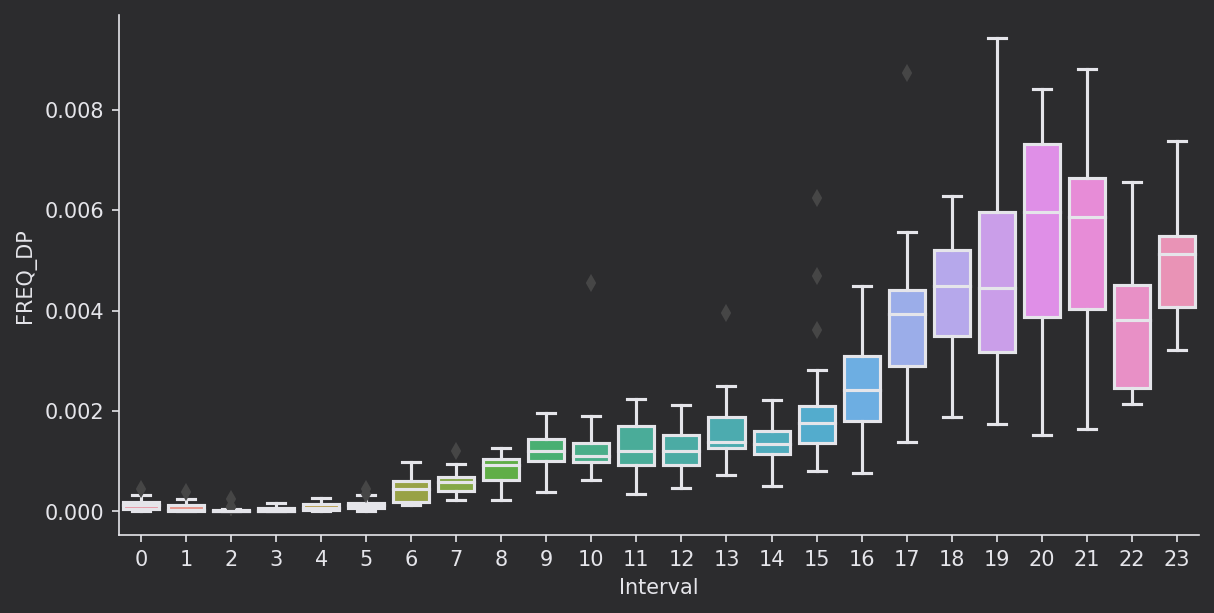

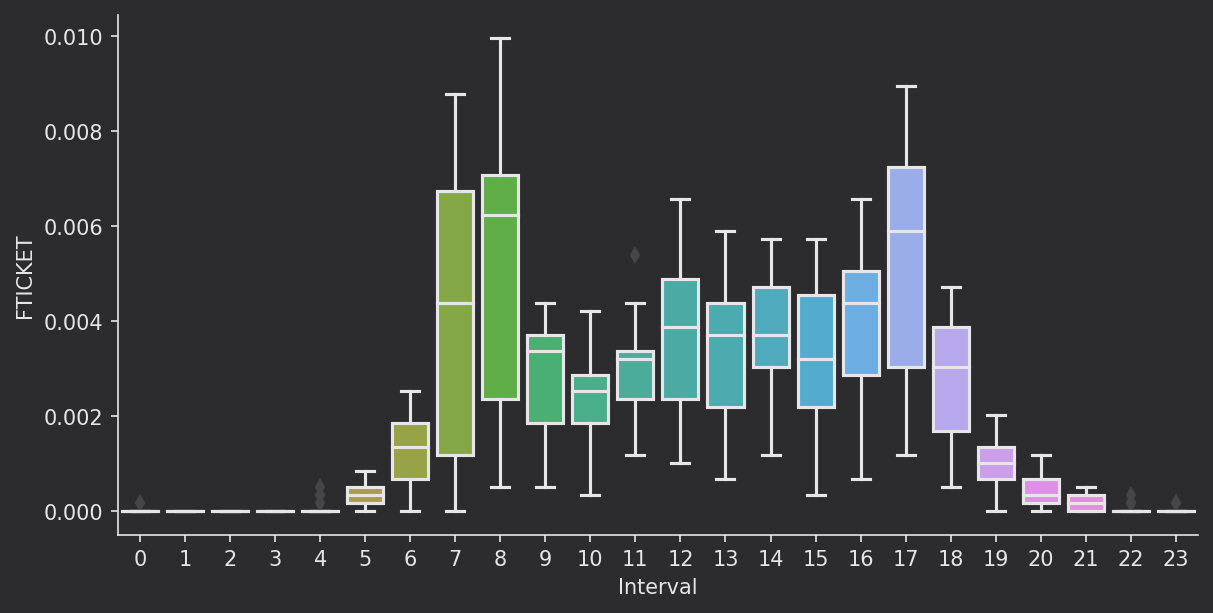

In [326]:
boxprops = {
    'boxprops':{'edgecolor':white_color},
    'medianprops':{'color':white_color},
    'whiskerprops':{'color':white_color},
    'capprops':{'color':white_color}
}

# height : scalar, optional
# Height (in inches) of each facet. See also: ``aspect``.

# aspect : scalar, optional
# Aspect ratio of each facet, so that ``aspect * height`` gives the width of each facet in inches.

sns.catplot(data=df_freq, x='Interval', y='FREQ',
            order=sorted(df_freq['Interval'].unique()), kind='box',
            height=4, aspect=2, **boxprops)

sns.catplot(data=df_freq, x='Interval', y='FREQ_2H',
            order=sorted(df_freq['Interval'].unique()), kind='box',
            height=4, aspect=2, **boxprops)

sns.catplot(data=df_freq, x='Interval', y='FREQ_1D',
            order=sorted(df_freq['Interval'].unique()), kind='box',
            height=4, aspect=2, **boxprops)

sns.catplot(data=df_freq, x='Interval', y='FREQ_DP',
            order=sorted(df_freq['Interval'].unique()), kind='box',
            height=4, aspect=2, **boxprops)

sns.catplot(data=df_freq, x='Interval', y='FTICKET',
            order=sorted(df_freq['Interval'].unique()), kind='box',
            height=4, aspect=2, **boxprops)

In [333]:
def score_distribution_kde_moovizy_by_day(column):
    fig = plt.figure(figsize=(10, 7))
    gs = fig.add_gridspec(6, 7)
    ax = fig.add_subplot(gs[:5,:])

    sns.kdeplot(x=column, hue='Day', data=df_freq,
                hue_order=sorted(df_freq['Day'].unique()),
                bw_adjust=0.4,
                fill=True,ax=ax)
    
    
    sub_axes = [None] * 7
    for idx, group in enumerate(sorted(df_freq['Day'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[5,idx])
        sns.kdeplot(x=column, data=df_freq,
                    alpha=0.2, color= white_color,
                    linewidth=0.7, label=group, fill=True, bw_adjust=0.4,
                    zorder=5, ax=sub_axes[idx]
                   )

        sns.kdeplot(x=column, data=df_freq[df_freq['Day']==group],
                    alpha=0.6, color= dark_palette[idx],
                    linewidth=0.5, label=group, fill=True,bw_adjust=0.4,
                    zorder=10, ax=sub_axes[idx]
                   )
        
        cnt = (df_freq['Day']==group).sum()
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])
        sub_axes[idx].set_xlabel('')
        sub_axes[idx].set_ylabel('')

    ax.set_title(column.capitalize(), loc='left', fontweight='bold', fontsize=13)

    fig.tight_layout()
    plt.show()

In [172]:
def score_distribution_kde_moovizy_by_weekend(column):
    fig = plt.figure(figsize=(10, 7))
    gs  = fig.add_gridspec(6, 5)
    ax  = fig.add_subplot(gs[:5,:])

    sns.kdeplot(x=column, hue='Weekend', data=mvz,
                hue_order=sorted(df_freq['Weekend'].unique()),
                bw_adjust=0.4,
                fill=True,ax=ax)
    
    
    sub_axes = [None] * 5
    for idx, group in enumerate(sorted(mvz['Weekend'].unique())):
        sub_axes[idx] = fig.add_subplot(gs[5,idx])
        sns.kdeplot(x=column, data=mvz,
                    alpha=0.2, color= white_color,
                    linewidth=0.7, label=group, fill=True, bw_adjust=0.4,
                    zorder=5, ax=sub_axes[idx]
                   )

        sns.kdeplot(x=column, data=mvz[mvz['Weekend']==group],
                    alpha=0.6, color= dark_palette[idx],
                    linewidth=0.5, label=group, fill=True,bw_adjust=0.4,
                    zorder=10, ax=sub_axes[idx]
                   )
        
        cnt = (mvz['Weekend']==group).sum()
        sub_axes[idx].set_xticks([])
        sub_axes[idx].set_yticks([])
        sub_axes[idx].set_xlabel('')
        sub_axes[idx].set_ylabel('')

    ax.set_title(column.capitalize(), loc='left', fontweight='bold', fontsize=13)

    fig.tight_layout()
    plt.show()

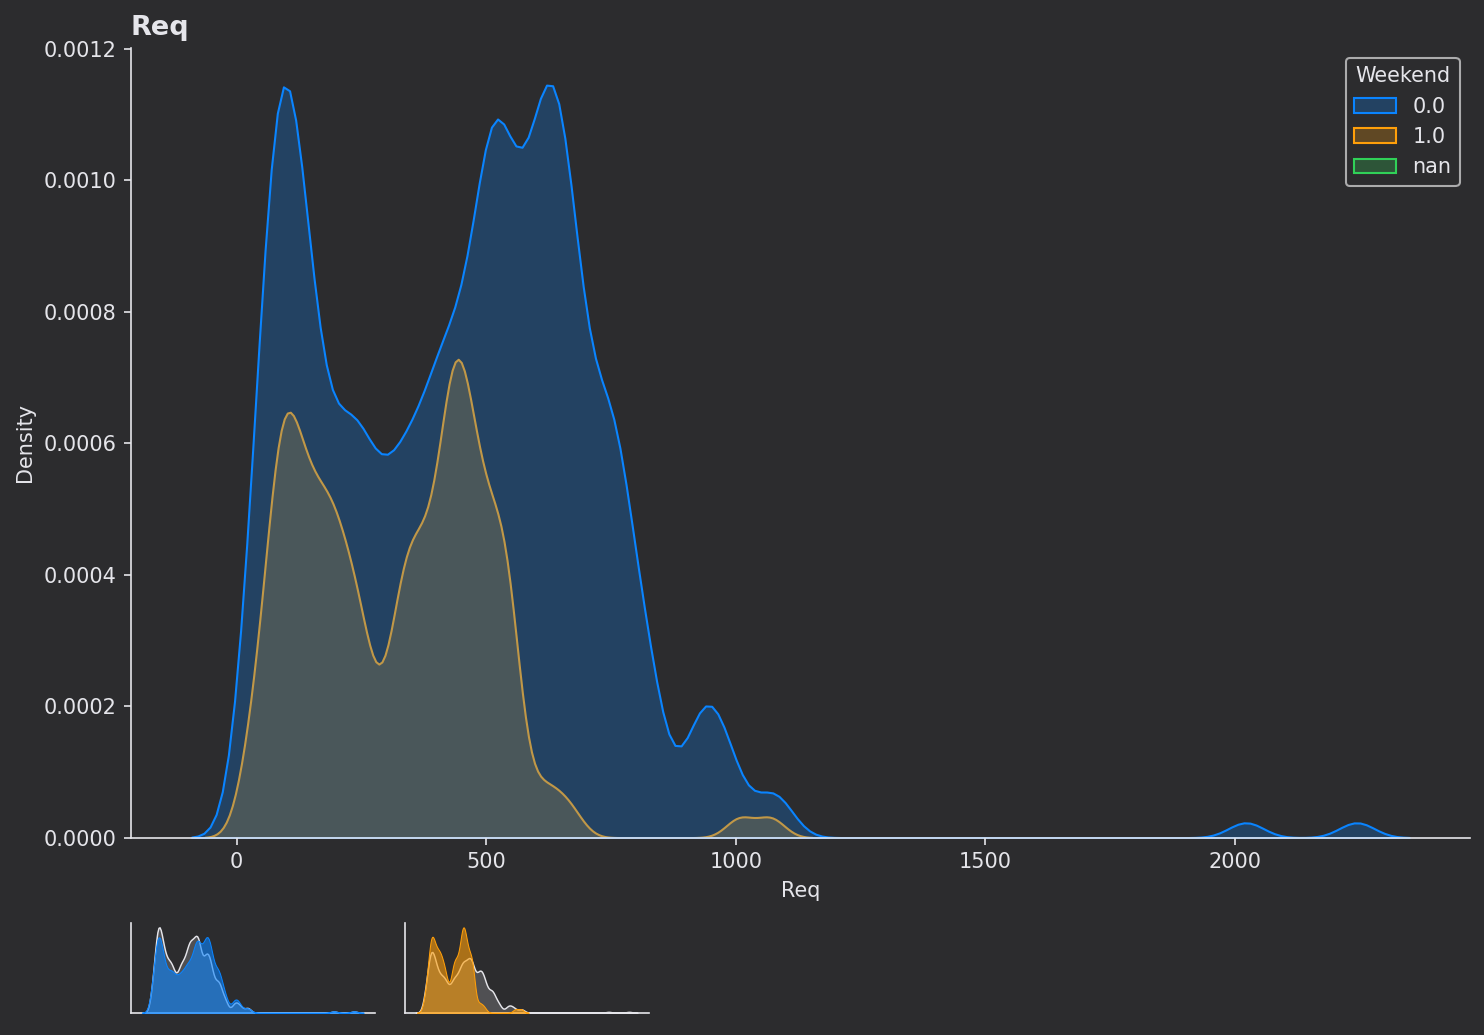

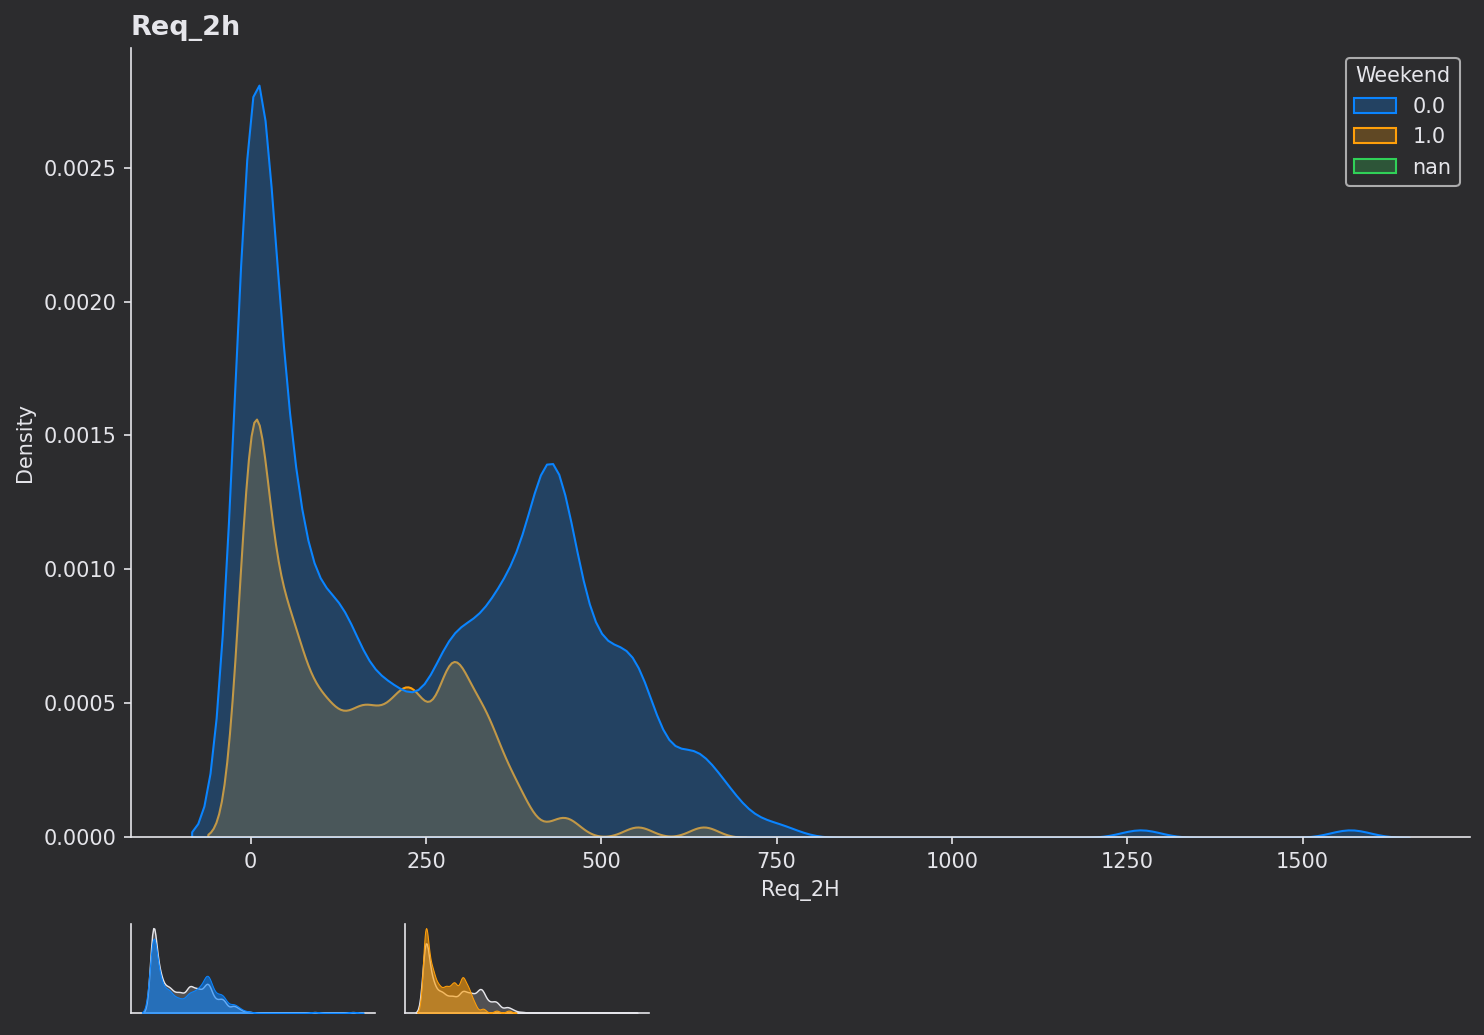

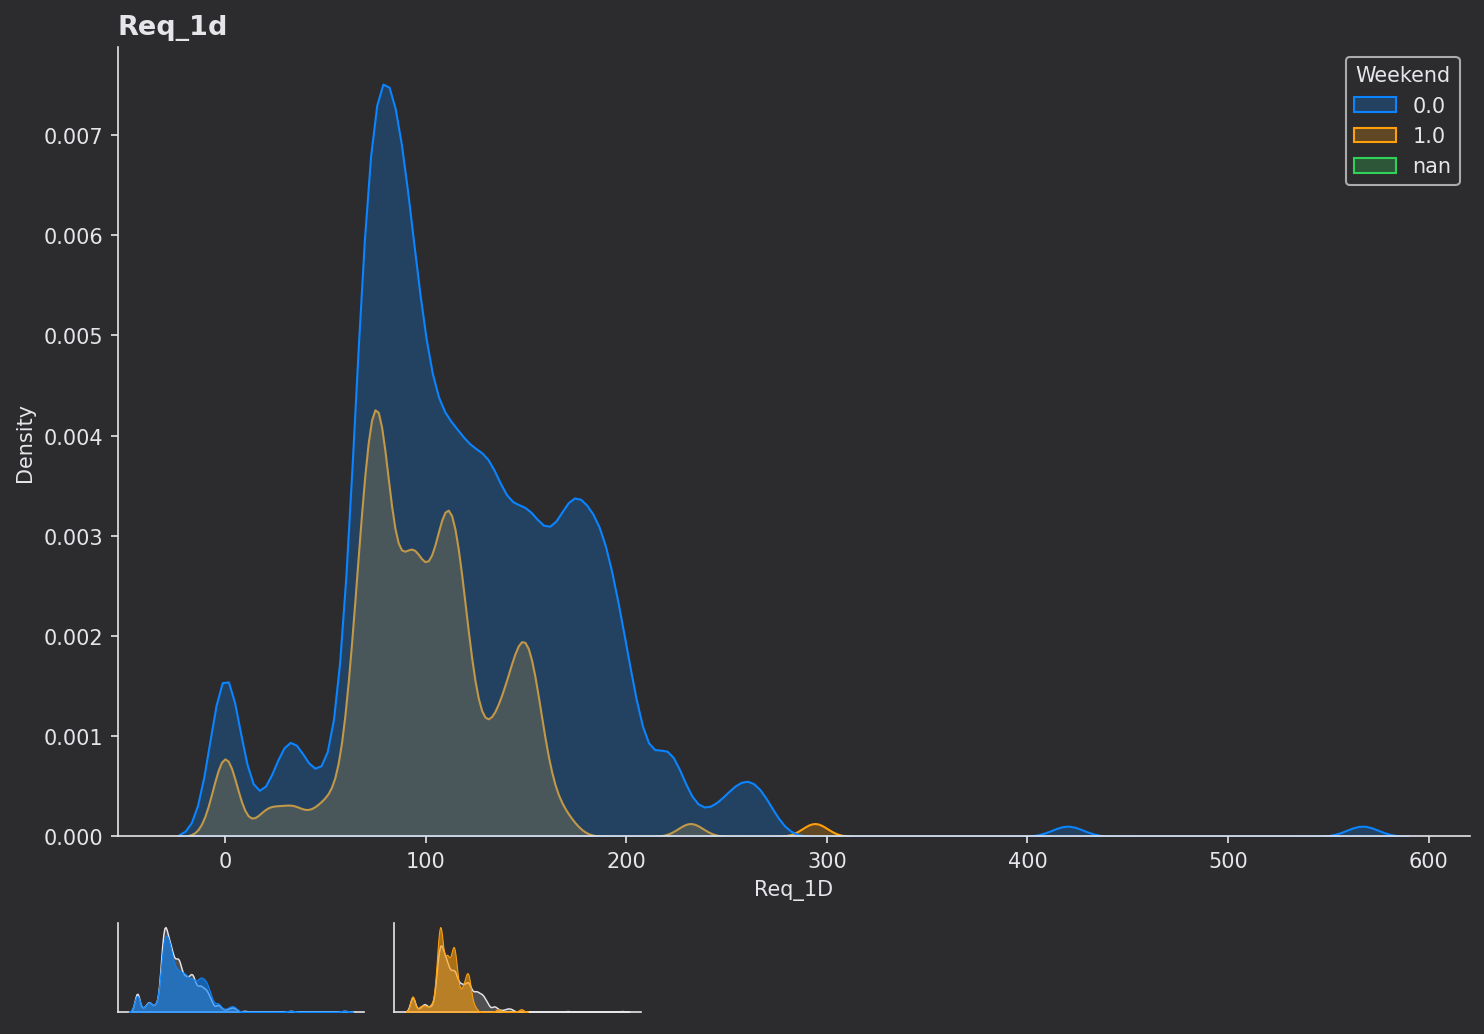

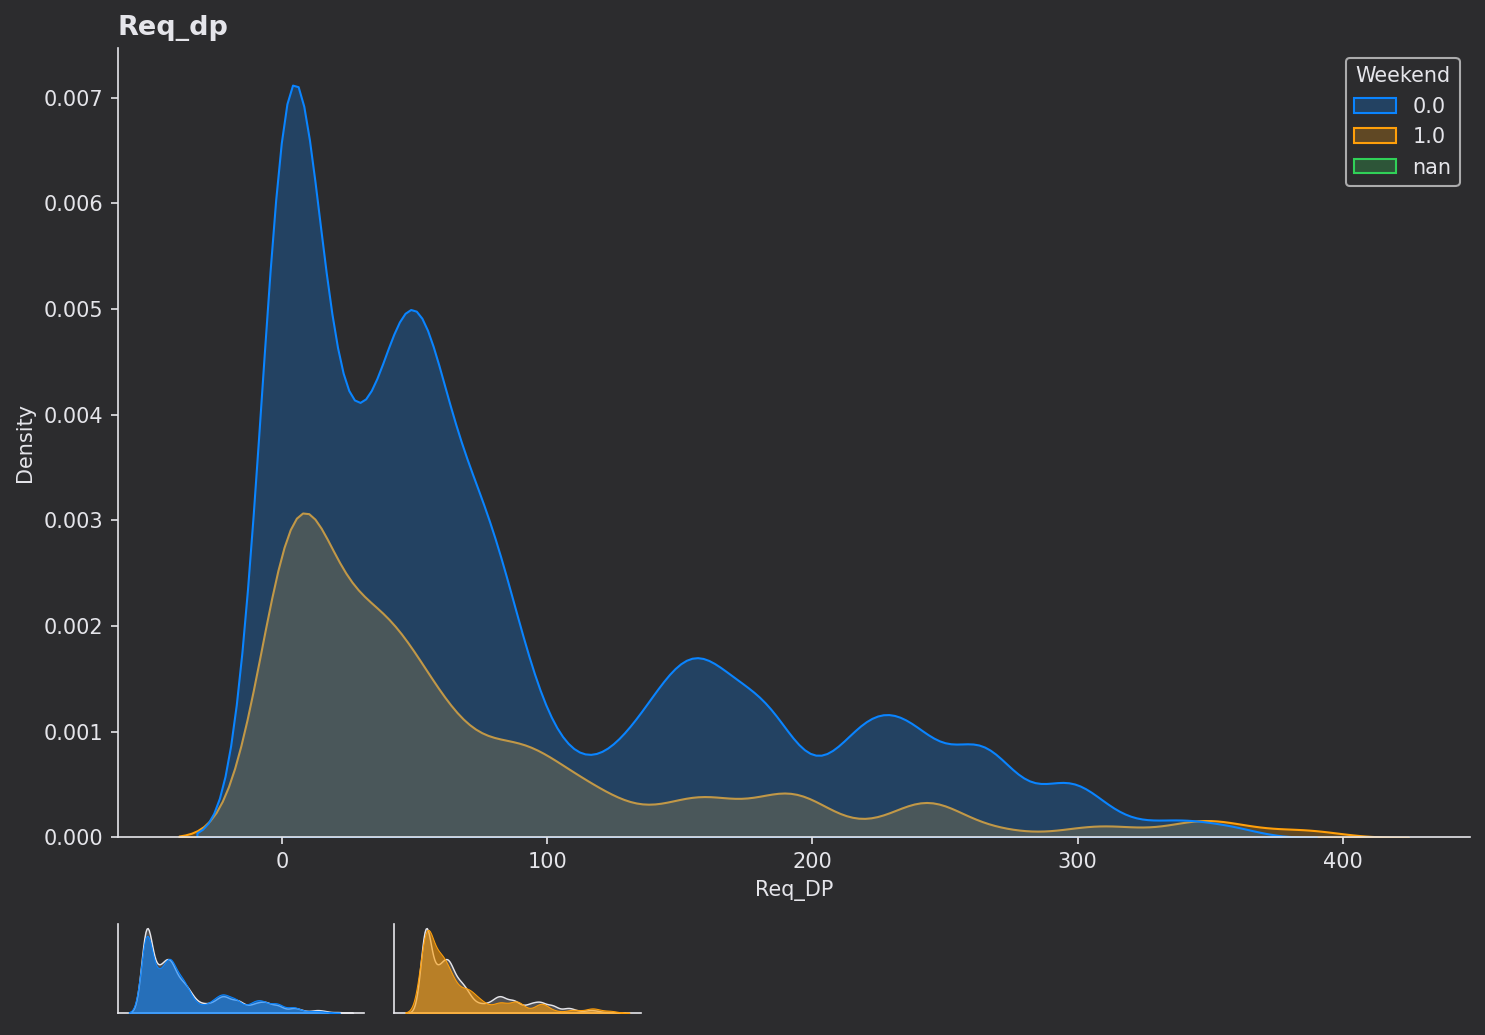

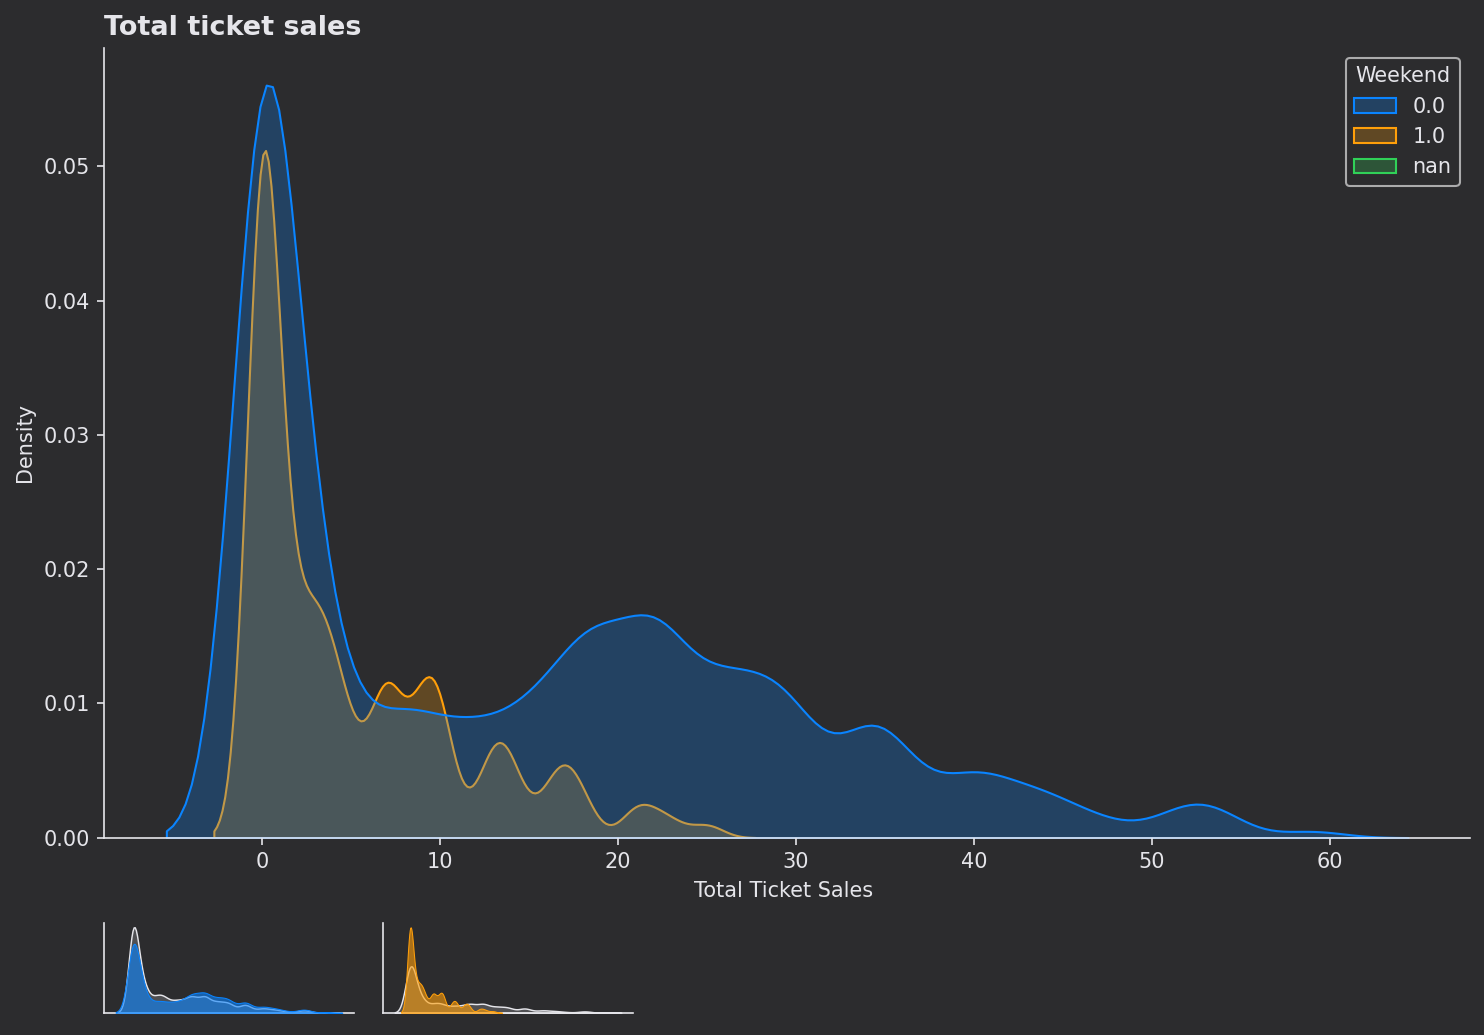

In [175]:
score_distribution_kde_moovizy_by_weekend('Req')
score_distribution_kde_moovizy_by_weekend('Req_2H')
score_distribution_kde_moovizy_by_weekend('Req_1D')
score_distribution_kde_moovizy_by_weekend('Req_DP')
score_distribution_kde_moovizy_by_weekend('Total Ticket Sales ')

In [17]:
mvz.columns

Index(['Date', 'Interval', 'Req', 'Req_2H', 'Req_1D', 'Req_DP',
       'TopSpeed (m/s)', 'Num_Transfer', 'Weekend', 'Day',
       'Total Ticket Sales ', 'Regular User ', 'Irregular Users', 'Lag_Tot',
       'Lag_Days', 'Lag_Hours', 'Lag_Mins', 'Lag_Secs', 'Lag_Tot_Sec'],
      dtype='object')

In [114]:
df_corr = mvz[['Req', 'Req_2H', 'Req_1D', 'Req_DP',
                'TopSpeed (m/s)', 'Num_Transfer', 'Weekend',
                'Total Ticket Sales ', 'Regular User ', 'Irregular Users']]

In [115]:
df_corr_2 = df_corr.rename(columns={'TopSpeed (m/s)':'TopSpeed',
                        'Total Ticket Sales ':'Ticket_Sales',
                        'Regular User':'Regular_User',
                        'Irregular Users':'Irregular_User'})

In [116]:
df_corr_2.replace([np.inf, -np.inf], np.mean(np.array(list(df_corr_2['TopSpeed']))), inplace=True)

In [147]:
# Correlation Matrix creation
corr_matrix = df_corr_2.corr(method = 'pearson')
corr_matrix
# Day column will not be present because it has str values

Req    Req_2H    Req_1D    Req_DP  TopSpeed  \
Req             1.000000  0.947510  0.826015  0.222347  0.339740   
Req_2H          0.947510  1.000000  0.847986 -0.080336  0.281561   
Req_1D          0.826015  0.847986  1.000000 -0.185882  0.182858   
Req_DP          0.222347 -0.080336 -0.185882  1.000000  0.237866   
TopSpeed        0.339740  0.281561  0.182858  0.237866  1.000000   
Num_Transfer    0.005937 -0.040272 -0.030506  0.136024  0.227537   
Weekend        -0.223232 -0.214168 -0.165248 -0.055947  0.006737   
Ticket_Sales    0.669689  0.698880  0.550201 -0.004938  0.251784   
Regular User    0.605501  0.624406  0.517591  0.000283  0.233983   
Irregular_User  0.666453  0.703208  0.526837 -0.009799  0.244155   

                Num_Transfer   Weekend  Ticket_Sales  Regular User   \
Req                 0.005937 -0.223232      0.669689       0.605501   
Req_2H             -0.040272 -0.214168      0.698880       0.624406   
Req_1D             -0.030506 -0.165248      0.550201       0.517591   
Req_DP              0.136024 -0.055947     -0.004938       0.000283   
TopSpeed            0.227537  0.006737      0.251784       0.233983   
Num_Transfer        1.000000  0.360430     -0.070900      -0.062238   
Weekend             0.360430  1.000000     -0.315663      -0.328773   
Ticket_Sales       -0.070900 -0.315663      1.000000       0.950481   
Regular User       -0.062238 -0.328773      0.950481       1.000000   
Irregular_User     -0.072478 -0.269521      0.947503       0.801213   

                Irregular_User  
Req                   0.666453  
Req_2H                0.703208  
Req_1D                0.526837  
Req_DP               -0.009799  
TopSpeed              0.244155  
Num_Transfer         -0.072478  
Weekend              -0.269521  
Ticket_Sales          0.947503  
Regular User          0.801213  
Irregular_User        1.000000

In [39]:
# mvz_dummy = pd.get_dummies(mvz_corr.Day)
# mvz_corr_2 = pd.concat([mvz_corr, mvz_dummy], axis = 1)
# mvz_corr_2.corr()

In [118]:
# Upper right side of triangle is redondunt. Let's mask it
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

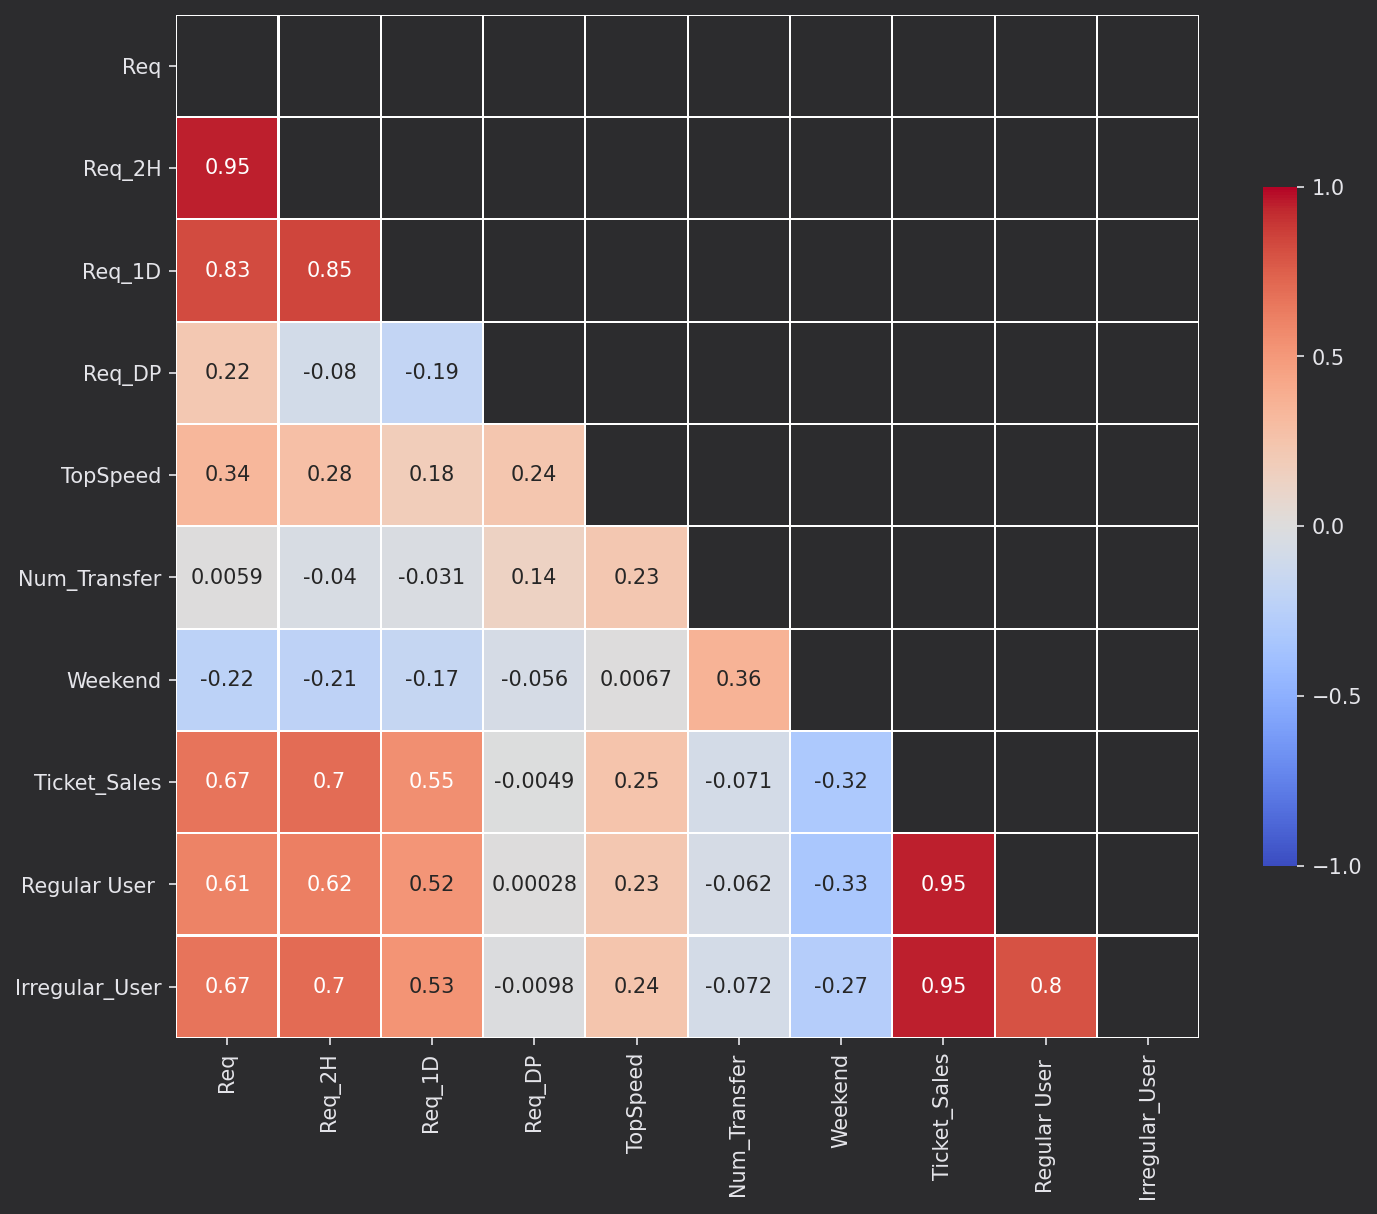

In [152]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                  'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [149]:
df_corr_2.columns

Index(['Req', 'Req_2H', 'Req_1D', 'Req_DP', 'TopSpeed', 'Num_Transfer',
       'Weekend', 'Ticket_Sales', 'Regular User ', 'Irregular_User'],
      dtype='object')

In [157]:
from scipy.stats import pearsonr


coef, p_val = pearsonr(df_corr_2.Ticket_Sales, df_corr_2.Req_2H)

round(p_val, 100)

4.369331421099422e-75

In [158]:
coef, p_val = pearsonr(df_corr_2.Ticket_Sales, df_corr_2.Req_1D)
round(p_val, 100)

3.191069877810886e-41